In [1]:
import pandas as pd


Import the King County data into pandas and run 
.info to see the number of rows, number of null values and dtypes in the dataframe

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Run .value_counts on the columns to see if there are any extraneous values that need replacing

In [520]:
for col in df.columns:
    print("\n",df[col].value_counts(normalize=True).head(),"\n\n")


 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 



 2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
Name: date, dtype: float64 



 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 



 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 



 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 



 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 



 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 



 1.0    0.494189
2.0    0.381303
1.5    0.088438
3.0    0.028291
2.5    0.007455
Name: floors, d

AttributeError: 'GeometryArray' object has no attribute 'value_counts'

Check the dataframe for null values.
1) In the "View" column, we decided to replace the null values with the mode view value as 90% of the data is 0


In [482]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
geometry            0
dtype: int64

In [483]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [499]:
view_mode = float(df.view.mode())

In [501]:
df['view'].fillna(view_mode, inplace =True)

In [502]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
geometry            0
dtype: int64

In [503]:
df = df.drop(['waterfront'], axis = 1)

In [504]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

In [508]:
df['yr_renovated'].value_counts().head()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [506]:
view_mode = float(df.yr_renovated.mode())
df['yr_renovated'].fillna(view_mode, inplace =True)

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
geometry         21597 non-null geometry
dtypes: datetime64[ns](1), float64(7), geometry(1), int64(11), obj

In [514]:
# Because sqft_basememnt is listed as an object, we need to analyze the data and see if there are any values 
# that are not ints or floats

df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [516]:
basement_mode = float(df.sqft_basement.mode())
df['sqft_basement'].replace('?', basement_mode, inplace = True)

In [518]:
df.sqft_basement.value_counts().head()

0.0      12826
0.0        454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [519]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
geometry         0
dtype: int64

In [8]:
zipcode_count = df.groupby(df['zipcode']).mean()
zipcode_count.head()

id         price  bedrooms  bathrooms  sqft_living  \
zipcode                                                                 
98001    4.651274e+09  2.811949e+05  3.393352   2.011773  1903.783934   
98002    4.850894e+09  2.342840e+05  3.326633   1.839196  1627.743719   
98003    4.674182e+09  2.941113e+05  3.357143   2.047321  1928.882143   
98004    4.394237e+09  1.356524e+06  3.854890   2.527603  2909.022082   
98005    4.961872e+09  8.102897e+05  3.851190   2.424107  2656.803571   

             sqft_lot    floors  waterfront      view  condition     grade  \
zipcode                                                                      
98001    14967.002770  1.430748    0.000000  0.094708   3.335180  7.296399   
98002     7517.633166  1.334171    0.000000  0.010050   3.743719  6.693467   
98003    10603.096429  1.310714    0.000000  0.214286   3.371429  7.542857   
98004    13104.220820  1.432177    0.003534  0.306962   3.495268  8.687697   
98005    19928.785714  1.279762    0.000000  0.095238   3.696429  8.488095   

          sqft_above     yr_built  yr_renovated        lat        long  \
zipcode                                                                  
98001    1723.756233  1980.867036     28.038732  47.309106 -122.270704   
98002    1522.537688  1967.773869     60.212121  47.308780 -122.213357   
98003    1663.550000  1976.885714     16.641667  47.315741 -122.310054   
98004    2419.842271  1971.470032    213.759542  47.616183 -122.205189   
98005    2160.196429  1969.744048     57.985507  47.611532 -122.167268   

         sqft_living15    sqft_lot15  
zipcode                               
98001      1830.099723  11218.875346  
98002      1479.030151   7585.482412  
98003      1876.196429   9746.178571  
98004      2674.700315  12805.022082  
98005      2567.863095  18367.773810

In [9]:
zip_sqft_living_sorted = zipcode_count.sort_values('sqft_living', ascending = False)

In [10]:
zip_sqft_living_sorted.head(10)

id         price  bedrooms  bathrooms  sqft_living  \
zipcode                                                                 
98039    3.755708e+09  2.161300e+06  4.060000   3.200000  3800.900000   
98040    4.199323e+09  1.194874e+06  4.028369   2.716312  3106.833333   
98075    4.660404e+09  7.907347e+05  3.855153   2.735376  3016.370474   
98004    4.394237e+09  1.356524e+06  3.854890   2.527603  2909.022082   
98006    4.621241e+09  8.599386e+05  3.841365   2.555723  2888.295181   
98077    3.153599e+09  6.828860e+05  3.616162   2.465909  2857.045455   
98005    4.961872e+09  8.102897e+05  3.851190   2.424107  2656.803571   
98074    5.061608e+09  6.856758e+05  3.625850   2.500000  2645.870748   
98053    5.740435e+09  6.772150e+05  3.225806   2.460298  2620.238213   
98065    7.390800e+09  5.296298e+05  3.545455   2.553571  2578.409091   

             sqft_lot    floors  waterfront      view  condition     grade  \
zipcode                                                                      
98039    17403.560000  1.560000    0.022222  0.440000   3.480000  9.560000   
98040    13704.464539  1.505319    0.044715  0.774194   3.787234  8.960993   
98075    19002.281337  1.809192    0.024465  0.317549   3.214485  9.008357   
98004    13104.220820  1.432177    0.003534  0.306962   3.495268  8.687697   
98006    13383.435743  1.459839    0.009132  0.631791   3.658635  8.795181   
98077    54829.000000  1.641414    0.000000  0.010101   3.348485  8.782828   
98005    19928.785714  1.279762    0.000000  0.095238   3.696429  8.488095   
98074    14522.244898  1.713152    0.015748  0.181818   3.126984  8.709751   
98053    35596.585608  1.658809    0.000000  0.067164   3.057072  8.280397   
98065    17137.324675  1.878247    0.000000  0.293160   3.045455  7.863636   

          sqft_above     yr_built  yr_renovated        lat        long  \
zipcode                                                                  
98039    3290.900000  1972.520000    448.400000  47.625840 -122.233540   
98040    2474.329787  1971.471631    240.269710  47.559846 -122.225592   
98075    2831.189415  1993.888579     33.557047  47.587491 -122.022524   
98004    2419.842271  1971.470032    213.759542  47.616183 -122.205189   
98006    2300.383534  1978.720884     82.798054  47.558022 -122.146839   
98077    2672.348485  1984.555556     34.703488  47.745922 -122.061202   
98005    2160.196429  1969.744048     57.985507  47.611532 -122.167268   
98074    2436.324263  1989.875283     33.511173  47.624084 -122.044785   
98053    2541.851117  1997.980149     24.036145  47.680032 -122.022871   
98065    2461.948052  1997.129870     31.688000  47.531765 -121.862156   

         sqft_living15    sqft_lot15  
zipcode                               
98039      3132.200000  17291.100000  
98040      2898.744681  12801.283688  
98075      2980.130919  15055.866295  
98004      2674.700315  12805.022082  
98006      2785.612450  12159.959839  
98077      2782.525253  45491.767677  
98005      2567.863095  18367.773810  
98074      2585.195011  13179.117914  
98053      2471.377171  29095.898263  
98065      2526.314935  11276.191558

In [11]:
zipcode_98039 = df[df['zipcode'] == 98039]

In [12]:
zipcode_98039.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2972 to 21498
Data columns (total 21 columns):
id               50 non-null int64
date             50 non-null object
price            50 non-null float64
bedrooms         50 non-null int64
bathrooms        50 non-null float64
sqft_living      50 non-null int64
sqft_lot         50 non-null int64
floors           50 non-null float64
waterfront       45 non-null float64
view             50 non-null float64
condition        50 non-null int64
grade            50 non-null int64
sqft_above       50 non-null int64
sqft_basement    50 non-null object
yr_built         50 non-null int64
yr_renovated     40 non-null float64
zipcode          50 non-null int64
lat              50 non-null float64
long             50 non-null float64
sqft_living15    50 non-null int64
sqft_lot15       50 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 8.6+ KB


In [13]:
zipcode_98040 = df[df['zipcode'] == 98040]
zipcode_98040.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 21 to 21581
Data columns (total 21 columns):
id               282 non-null int64
date             282 non-null object
price            282 non-null float64
bedrooms         282 non-null int64
bathrooms        282 non-null float64
sqft_living      282 non-null int64
sqft_lot         282 non-null int64
floors           282 non-null float64
waterfront       246 non-null float64
view             279 non-null float64
condition        282 non-null int64
grade            282 non-null int64
sqft_above       282 non-null int64
sqft_basement    282 non-null object
yr_built         282 non-null int64
yr_renovated     241 non-null float64
zipcode          282 non-null int64
lat              282 non-null float64
long             282 non-null float64
sqft_living15    282 non-null int64
sqft_lot15       282 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 48.5+ KB


In [14]:
zipcode_count2 = df.groupby(df['zipcode']).count()
zipcode_count2.head(10)

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode                                                                         
98001    361   361    361       361        361          361       361     361   
98002    199   199    199       199        199          199       199     199   
98003    280   280    280       280        280          280       280     280   
98004    317   317    317       317        317          317       317     317   
98005    168   168    168       168        168          168       168     168   
98006    498   498    498       498        498          498       498     498   
98007    141   141    141       141        141          141       141     141   
98008    283   283    283       283        283          283       283     283   
98010    100   100    100       100        100          100       100     100   
98011    195   195    195       195        195          195       195     195   

         waterfront  view  condition  grade  sqft_above  sqft_basement  \
zipcode                                                                  
98001           328   359        361    361         361            361   
98002           179   199        199    199         199            199   
98003           255   280        280    280         280            280   
98004           283   316        317    317         317            317   
98005           158   168        168    168         168            168   
98006           438   497        498    498         498            498   
98007           121   141        141    141         141            141   
98008           256   283        283    283         283            283   
98010            87   100        100    100         100            100   
98011           175   194        195    195         195            195   

         yr_built  yr_renovated  lat  long  sqft_living15  sqft_lot15  
zipcode                                                                
98001         361           284  361   361            361         361  
98002         199           165  199   199            199         199  
98003         280           240  280   280            280         280  
98004         317           262  317   317            317         317  
98005         168           138  168   168            168         168  
98006         498           411  498   498            498         498  
98007         141           116  141   141            141         141  
98008         283           237  283   283            283         283  
98010         100            82  100   100            100         100  
98011         195           159  195   195            195         195

In [15]:
zip_count_sorted = zipcode_count2.sort_values('id', ascending = False)

In [16]:
zip_count_sorted_top15 = zip_count_sorted.iloc[0:15]
zip_count_sorted_top15

id  date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
zipcode                                                                         
98103    602   602    602       602        602          602       602     602   
98038    589   589    589       589        589          589       589     589   
98115    583   583    583       583        583          583       583     583   
98052    574   574    574       574        574          574       574     574   
98117    553   553    553       553        553          553       553     553   
98042    547   547    547       547        547          547       547     547   
98034    545   545    545       545        545          545       545     545   
98118    507   507    507       507        507          507       507     507   
98023    499   499    499       499        499          499       499     499   
98006    498   498    498       498        498          498       498     498   
98133    493   493    493       493        493          493       493     493   
98059    468   468    468       468        468          468       468     468   
98058    455   455    455       455        455          455       455     455   
98155    446   446    446       446        446          446       446     446   
98074    441   441    441       441        441          441       441     441   

         waterfront  view  condition  grade  sqft_above  sqft_basement  \
zipcode                                                                  
98103           540   601        602    602         602            602   
98038           528   586        589    589         589            589   
98115           515   580        583    583         583            583   
98052           506   573        574    574         574            574   
98117           495   553        553    553         553            553   
98042           486   545        547    547         547            547   
98034           484   545        545    545         545            545   
98118           447   505        507    507         507            507   
98023           447   495        499    499         499            499   
98006           438   497        498    498         498            498   
98133           428   492        493    493         493            493   
98059           407   468        468    468         468            468   
98058           395   454        455    455         455            455   
98155           398   445        446    446         446            446   
98074           381   440        441    441         441            441   

         yr_built  yr_renovated  lat  long  sqft_living15  sqft_lot15  
zipcode                                                                
98103         602           480  602   602            602         602  
98038         589           493  589   589            589         589  
98115         583           464  583   583            583         583  
98052         574           467  574   574            574         574  
98117         553           451  553   553            553         553  
98042         547           460  547   547            547         547  
98034         545           443  545   545            545         545  
98118         507           423  507   507            507         507  
98023         499           415  499   499            499         499  
98006         498           411  498   498            498         498  
98133         493           405  493   493            493         493  
98059         468           379  468   468            468         468  
98058         455           368  455   455            455         455  
98155         446           352  446   446            446         446  
98074         441           358  441   441            441         441

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

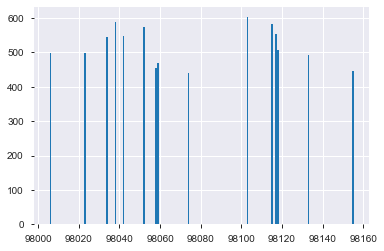

In [18]:

ax = plt.bar(zip_count_sorted_top15.index.values,zip_count_sorted_top15['id'])

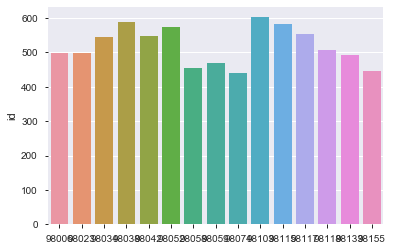

In [19]:
sns.barplot(zip_count_sorted_top15.index.values,zip_count_sorted_top15['id'])


In [20]:
zip_top15_mean = zip_count_sorted_top15.merge(zip_sqft_living_sorted, how = 'left', on = 'zipcode')

In [21]:
zip_top15_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 98103 to 98074
Data columns (total 38 columns):
id_x               15 non-null int64
date               15 non-null int64
price_x            15 non-null int64
bedrooms_x         15 non-null int64
bathrooms_x        15 non-null int64
sqft_living_x      15 non-null int64
sqft_lot_x         15 non-null int64
floors_x           15 non-null int64
waterfront_x       15 non-null int64
view_x             15 non-null int64
condition_x        15 non-null int64
grade_x            15 non-null int64
sqft_above_x       15 non-null int64
sqft_basement      15 non-null int64
yr_built_x         15 non-null int64
yr_renovated_x     15 non-null int64
lat_x              15 non-null int64
long_x             15 non-null int64
sqft_living15_x    15 non-null int64
sqft_lot15_x       15 non-null int64
id_y               15 non-null float64
price_y            15 non-null float64
bedrooms_y         15 non-null float64
bathrooms_y        15 non-null fl

In [22]:
list_x = zip_top15_mean.columns

In [23]:
list_x

Index(['id_x', 'date', 'price_x', 'bedrooms_x', 'bathrooms_x', 'sqft_living_x',
       'sqft_lot_x', 'floors_x', 'waterfront_x', 'view_x', 'condition_x',
       'grade_x', 'sqft_above_x', 'sqft_basement', 'yr_built_x',
       'yr_renovated_x', 'lat_x', 'long_x', 'sqft_living15_x', 'sqft_lot15_x',
       'id_y', 'price_y', 'bedrooms_y', 'bathrooms_y', 'sqft_living_y',
       'sqft_lot_y', 'floors_y', 'waterfront_y', 'view_y', 'condition_y',
       'grade_y', 'sqft_above_y', 'yr_built_y', 'yr_renovated_y', 'lat_y',
       'long_y', 'sqft_living15_y', 'sqft_lot15_y'],
      dtype='object')

In [24]:
list_y = ['date', 'price_x', 'bedrooms_x', 'bathrooms_x', 'sqft_living_x',
       'sqft_lot_x', 'floors_x', 'waterfront_x', 'view_x', 'condition_x',
       'grade_x', 'sqft_above_x', 'sqft_basement', 'yr_built_x',
       'yr_renovated_x', 'lat_x', 'long_x', 'sqft_living15_x', 'sqft_lot15_x',
       'id_y']

In [25]:
zip_top15_mean.drop(list_y, axis =1, inplace = True)

In [26]:
zip_top15_mean

id_x        price_y  bedrooms_y  bathrooms_y  sqft_living_y  \
zipcode                                                                
98103     602  585048.779070    3.059801     1.934801    1650.830565   
98038     589  367091.483871    3.441426     2.375637    2148.288625   
98115     583  619944.149228    3.204117     1.866638    1835.295026   
98052     574  645244.226481    3.616725     2.364547    2363.655052   
98117     553  576834.808318    3.019892     1.812839    1692.039783   
98042     547  311580.336380    3.404022     2.126143    1981.696527   
98034     545  521740.014679    3.467890     2.123394    1978.656881   
98118     507  418019.360947    3.132150     1.765286    1689.303748   
98023     499  286742.811623    3.424850     2.061623    1989.729459   
98006     498  859938.554217    3.841365     2.555723    2888.295181   
98133     493  387011.590264    3.137931     1.735294    1614.762677   
98059     468  493625.309829    3.717949     2.342415    2403.653846   
98058     455  353619.074725    3.523077     2.100000    2049.630769   
98155     446  423736.905830    3.322870     1.815022    1786.614350   
98074     441  685675.843537    3.625850     2.500000    2645.870748   

           sqft_lot_y  floors_y  waterfront_y    view_y  condition_y  \
zipcode                                                                
98103     3482.445183  1.827243      0.000000  0.144759     3.483389   
98038    25419.129032  1.740238      0.000000  0.027304     3.193548   
98115     5444.144082  1.420240      0.001942  0.201724     3.512864   
98052    11122.012195  1.581010      0.005929  0.064572     3.322300   
98117     4636.388788  1.457505      0.000000  0.182640     3.538879   
98042    18974.215722  1.497258      0.000000  0.033028     3.519196   
98034     9774.192661  1.316514      0.010331  0.201835     3.379817   
98118     5780.185404  1.343195      0.006711  0.255446     3.351085   
98023    10470.208417  1.323647      0.006711  0.119192     3.386774   
98006    13383.435743  1.459839      0.009132  0.631791     3.658635   
98133     7094.606491  1.397566      0.000000  0.016260     3.541582   
98059    14405.946581  1.627137      0.000000  0.042735     3.395299   
98058    19518.784615  1.384615      0.000000  0.022026     3.465934   
98155    10284.674888  1.218610      0.012563  0.170787     3.473094   
98074    14522.244898  1.713152      0.015748  0.181818     3.126984   

          grade_y  sqft_above_y   yr_built_y  yr_renovated_y      lat_y  \
zipcode                                                                   
98103    7.410299   1405.044850  1953.089701      103.841667  47.676024   
98038    7.597623   2055.334465  1995.799660       36.444219  47.370640   
98115    7.361921   1406.921098  1948.926244      137.428879  47.685484   
98052    8.191638   2102.313589  1985.353659       34.231263  47.680538   
98117    7.282098   1333.359855  1948.271248      101.929047  47.686889   
98042    7.424132   1846.285192  1986.383912       47.821739  47.365699   
98034    7.506422   1661.302752  1976.344954       13.440181  47.720688   
98118    6.976331   1331.015779  1950.305720      108.626478  47.543839   
98023    7.575150   1705.773547  1978.809619       23.932530  47.308622   
98006    8.795181   2300.383534  1978.720884       82.798054  47.558022   
98133    7.123732   1361.752535  1963.259635       68.782716  47.735655   
98059    7.893162   2269.743590  1988.944444       42.126649  47.492736   
98058    7.562637   1805.454945  1978.461538       59.695652  47.446085   
98155    7.170404   1478.071749  1961.136771       85.178977  47.754863   
98074    8.709751   2436.324263  1989.875283       33.511173  47.624084   

             long_y  sqft_living15_y  sqft_lot15_y  
zipcode                                             
98103   -122.344130      1524.152824   3472.323920  
98038   -122.031754      2118.945671  20079.164686  
98115   -122.301789      1691.614065   5286.475129  
98052   -122.11927

In [56]:
lis_bar = zip_top15_mean.index.values
lis_bar

array([98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023,
       98006, 98133, 98059, 98058, 98155, 98074])

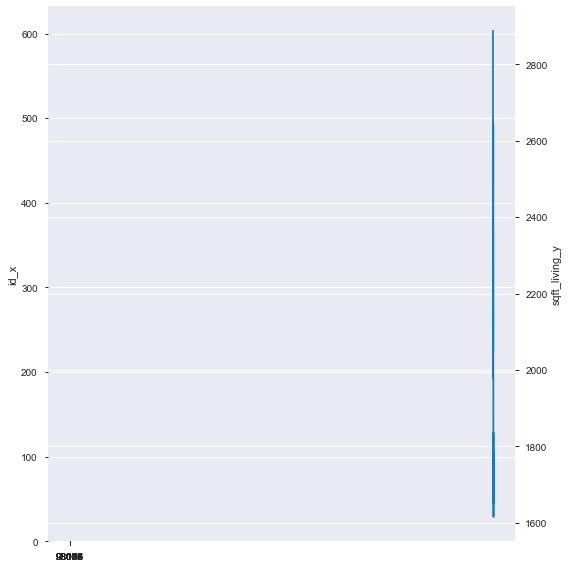

In [66]:
fig, ax1 = plt.subplots(figsize= (8,8))


ax1= sns.barplot(zip_top15_mean.index.values, zip_top15_mean['id_x'],ax=ax1, order = lis_bar)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2=sns.lineplot(zip_top15_mean.index.values, zip_top15_mean['sqft_living_y'], sort=True,ax=ax2)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()


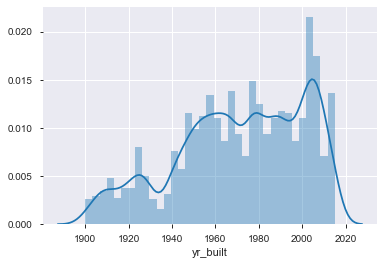

In [71]:
ax = sns.distplot(df['yr_built'])


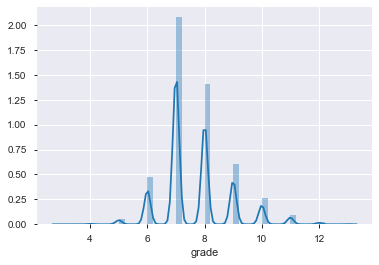

In [70]:
ax2= sns.distplot(df['grade'])

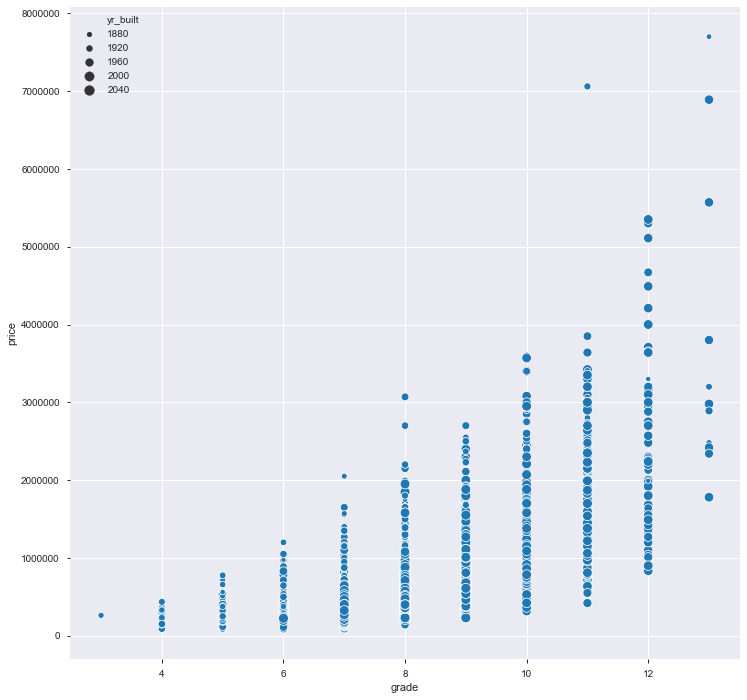

In [78]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['grade'], df['price'], size = df['yr_built'])

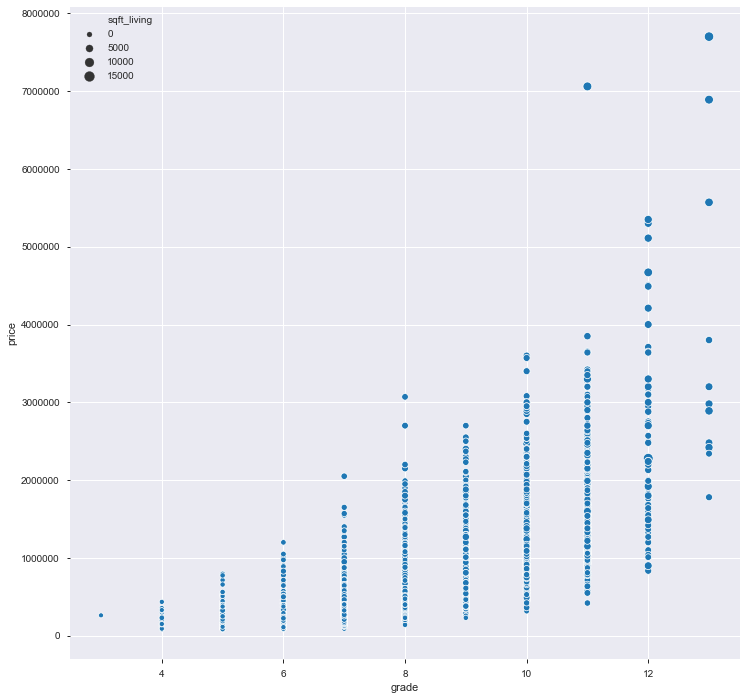

In [79]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['grade'], df['price'], size = df['sqft_living'])

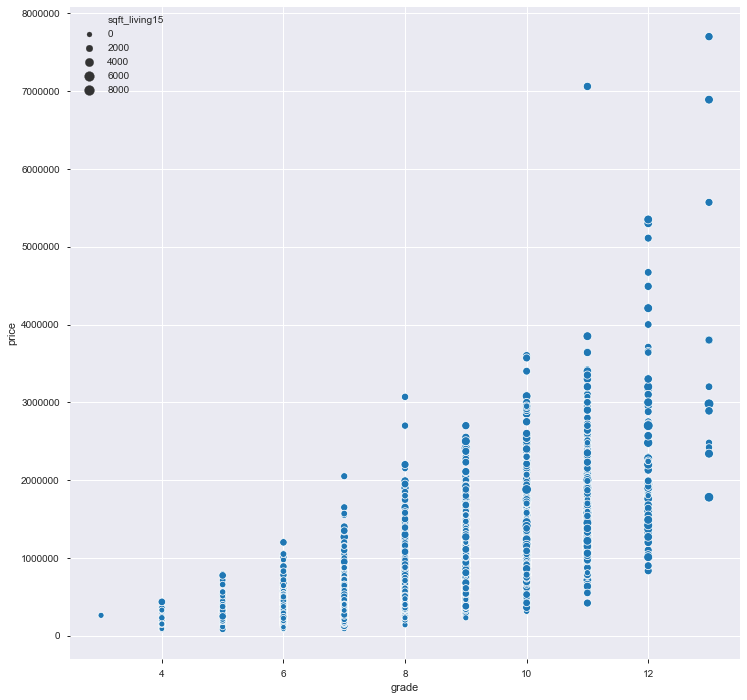

In [80]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['grade'], df['price'], size = df['sqft_living15'])

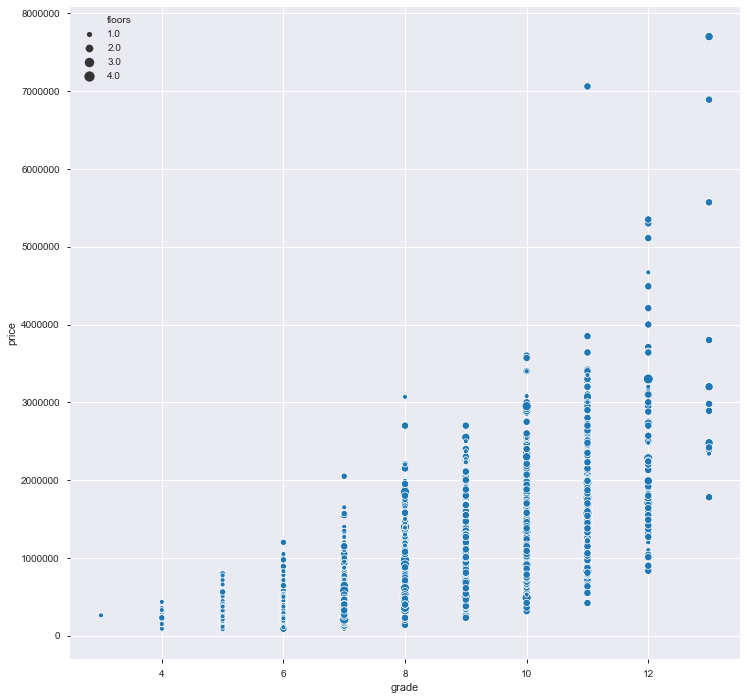

In [81]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['grade'], df['price'], size = df['floors'])

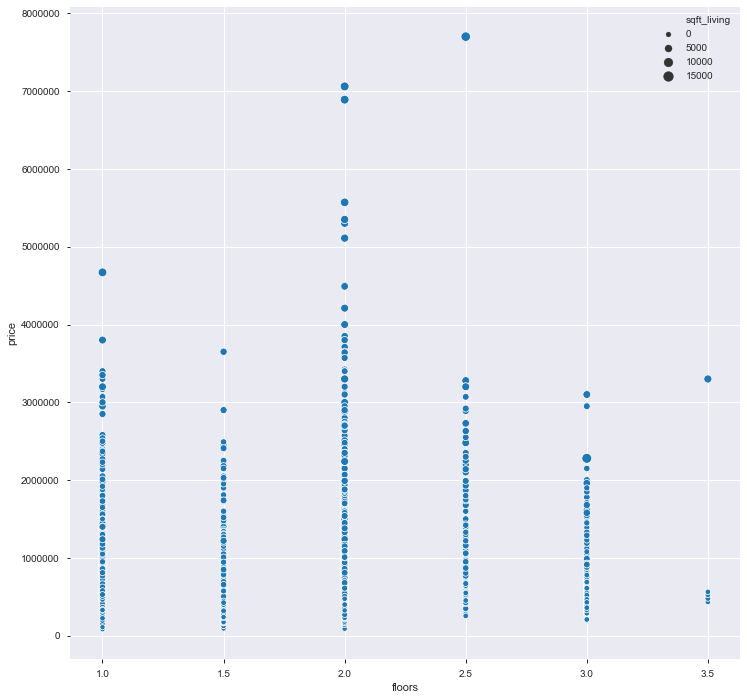

In [83]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['floors'], df['price'], size = df['sqft_living'])

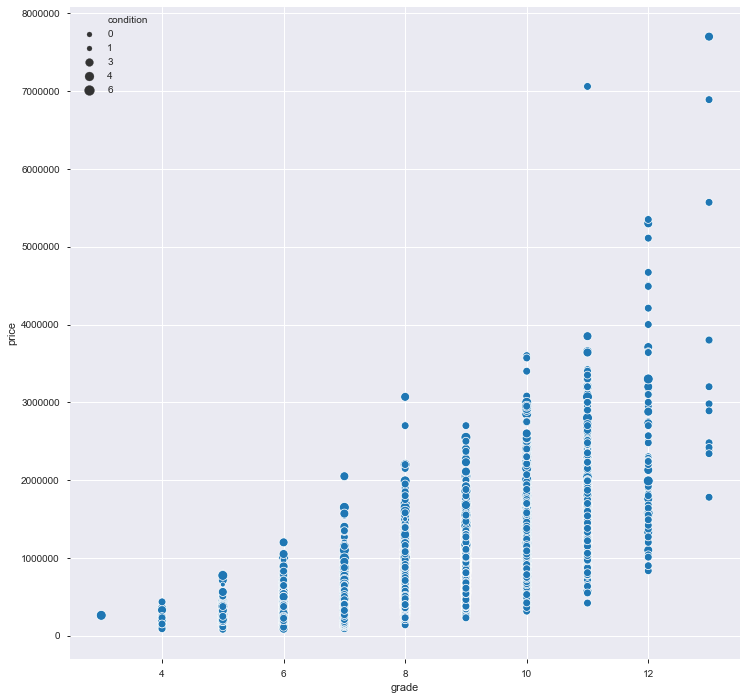

In [84]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['grade'], df['price'], size = df['condition'])

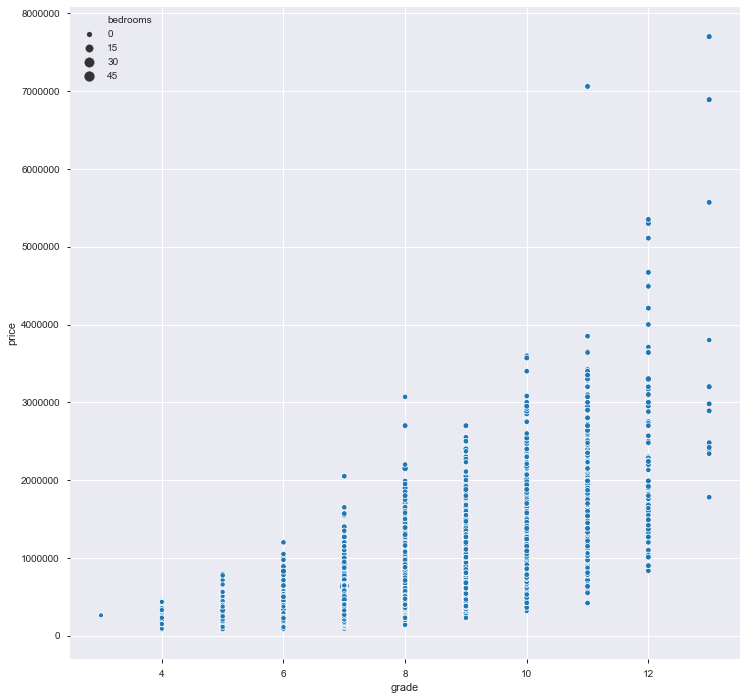

In [85]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['grade'], df['price'], size = df['bedrooms'])

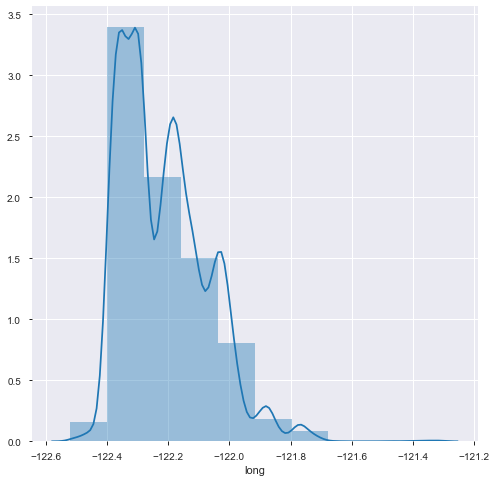

In [96]:
plt.figure(figsize = (8,8))
ax= sns.distplot(df['long'], bins=10)

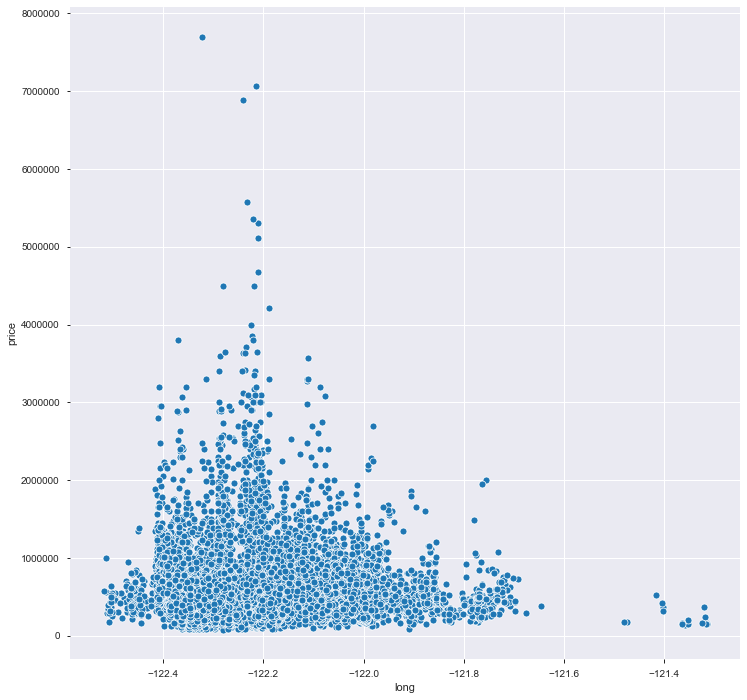

In [97]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['long'], df['price'])

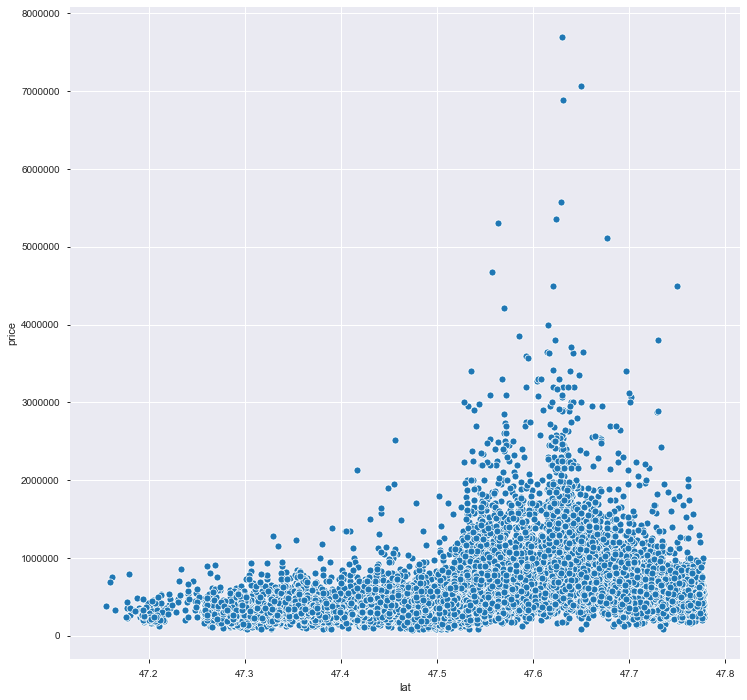

In [98]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['lat'], df['price'])

In [100]:
import geopandas as gpd
import descartes

In [102]:
from shapely.geometry import Point, Polygon

In [103]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:5]

In [105]:
crs = {'init' : 'epsg:4326'}

In [107]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   
2     10000     1.0         0.0   0.0  ...         770            0.0   
3      5000     1.0         0.0   0.0  ...        1050          910.0   
4      8080     1.0         0.0   0.0  ...        1680            0.0   

   yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          0.0    98178  47.5112 -122.257           1340   
1      1951       1991.0    98125  47.7210 -122.319           1690   
2      1933          NaN    98028  47.7379 -122.233           2720   
3      1965          0.0    98136  47.5208 -122.393           1360   
4      1987          0.0    98074  47.6168 -122.045           1800   

   sqft_lot15                     geometry  
0        5650  POINT (-122.25700 47.51120)  
1        7639  POINT (-122.31900 47.72100)  
2        8062  POINT (-122.23300 47.73790)  
3        5000  POINT (-122.39300 47.52080)  
4        7503  POINT (-122.04500 47.61680)  

[5 rows x 22 columns]

In [121]:
geo_df_zip15= geo_df[geo_df['zipcode'].map(lambda x: x in lis_bar)]

In [122]:
geo_df_zip15

id        date      price  bedrooms  bathrooms  sqft_living  \
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
11     9212900260   5/27/2014   468000.0         2       1.00         1160   
13     6054650070   10/7/2014   400000.0         3       1.75         1370   
17     6865200140   5/29/2014   485000.0         4       1.00         1600   
20     6300500875   5/14/2014   385000.0         4       1.75         1620   
28     5101402488   6/24/2014   438000.0         3       1.75         1520   
29     1873100390    3/2/2015   719000.0         4       2.50         2570   
31     2426039314   12/1/2014   280000.0         2       1.50         1190   
32      461000390   6/24/2014   687500.0         4       1.75         2330   
33     7589200193  11/10/2014   535000.0         3       1.00         1090   
34     7955080270   12/3/2014   322500.0         4       2.75         2060   
35     9547205180   6/13/2014   696000.0         3       2.50         2300   
36     9435300030   5/28/2014   550000.0         4       1.00         1660   
40     5547700270   7/15/2014   625000.0         4       2.50         2570   
44     1432701230   7/29/2014   309000.0         3       1.00         1280   
46     8945200830   3/25/2015   210490.0         3       1.00          990   
48     9215400105   4/28/2015   450000.0         3       1.75         1250   
52     7518505990  12/31/2014   600000.0         3       1.75         1410   
53     3626039271    2/5/2015   585000.0         2       1.75         1980   
56     9478500640   8/19/2014   292500.0         4       2.50         2250   
57     2799800710    4/7/2015   301000.0         3       2.50         2420   
59     8079040320   2/23/2015   430000.0         4       3.00         1850   
63     9528102996   12/7/2014   549000.0         3       1.75         1540   
68     1274500060   8/25/2014   204000.0         3       1.00         1000   
71     1049000060    1/5/2015   325000.0         3       2.00         1260   
73     5416510140   7/10/2014   360000.0         4       2.50         2380   
74     3444100400   3/16/2015   349000.0         3       1.75         1790   
78     6300000287    6/9/2014   410000.0         3       1.00         1410   
80     5104520400   12/2/2014   390000.0         3       2.50         2350   
...           ...         ...        ...       ...        ...          ...   
21503  1702901618    4/7/2015   420000.0         1       2.00         1070   
21506   603000555    3/2/2015   462500.0         6       3.00         2390   
21507  3304300300    5/7/2015   579950.0         4       2.75         2460   
21508  6453550090    5/5/2015   861111.0         4       2.50         3650   
21509  2625069038  11/24/2014  1450000.0         4       3.50         4300   
21510  1760650820   4/28/2015   290000.0         3       2.25         1610   
21519  2909310100  10/15/2014   332000.0         4       2.50         2380   
21522  1865400076    5/9/2014   324000.0         3       2.25          998   
21524   715010530   1/13/2015  1880000.0         5       3.50         4410   
21527  1972200227   10/7/2014   459000.0         3       1.50         1160   
21530  9211010300    7/7/2014   509900.0         3       2.50         3030   
21535  1561750040  12/24/2014  1380000.0         5       4.50         4350   
21537  2522059251    4/9/2015   465000.0         3       2.50         2050   
21545  6664500090   1/15/2015   750000.0         5       4.00         4500   
21547  9406530090  10/20/2014   337000.0         4       2.50         2470   
21548  7168100015   10/9/2014   579950.0         5       2.75         3080   
21551  9521100031   6/18/2014   690000.0         3       3.25         1540   
21553  6021503705  10/15/2014   329000.0         2       2.50          980   
21558  1931300090    5/7/2014   610950.0         3       3.00         1680   
21559  9578500790  11/11/2014   39995

In [110]:
street_map = gpd.read_file('./tl_2017_53033_roads/tl_2017_53033_roads.shp')

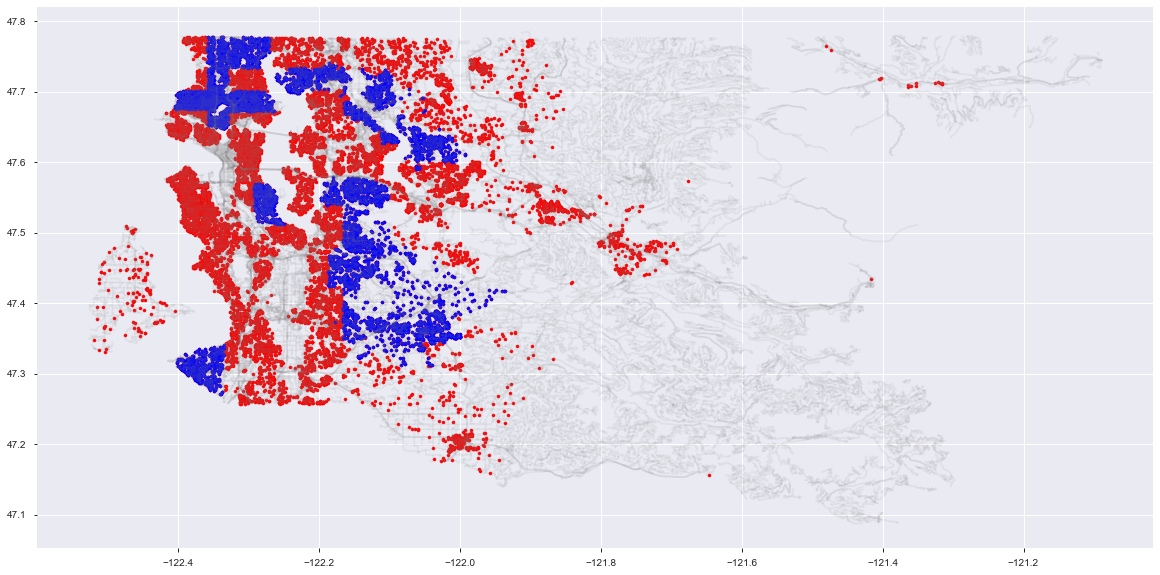

In [125]:
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
geo_df.plot(ax=ax, markersize = 10, color='red')
geo_df_zip15.plot(ax=ax, markersize = 10, color='blue')
plt.savefig('longlat2.png')

In [127]:
df_98116 = df[df['zipcode']==98116]

In [129]:
df_98116.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 77 to 21591
Data columns (total 22 columns):
id               330 non-null int64
date             330 non-null object
price            330 non-null float64
bedrooms         330 non-null int64
bathrooms        330 non-null float64
sqft_living      330 non-null int64
sqft_lot         330 non-null int64
floors           330 non-null float64
waterfront       298 non-null float64
view             328 non-null float64
condition        330 non-null int64
grade            330 non-null int64
sqft_above       330 non-null int64
sqft_basement    330 non-null object
yr_built         330 non-null int64
yr_renovated     280 non-null float64
zipcode          330 non-null int64
lat              330 non-null float64
long             330 non-null float64
sqft_living15    330 non-null int64
sqft_lot15       330 non-null int64
geometry         330 non-null geometry
dtypes: float64(8), geometry(1), int64(11), object(2)
memory usage: 59.3+ KB


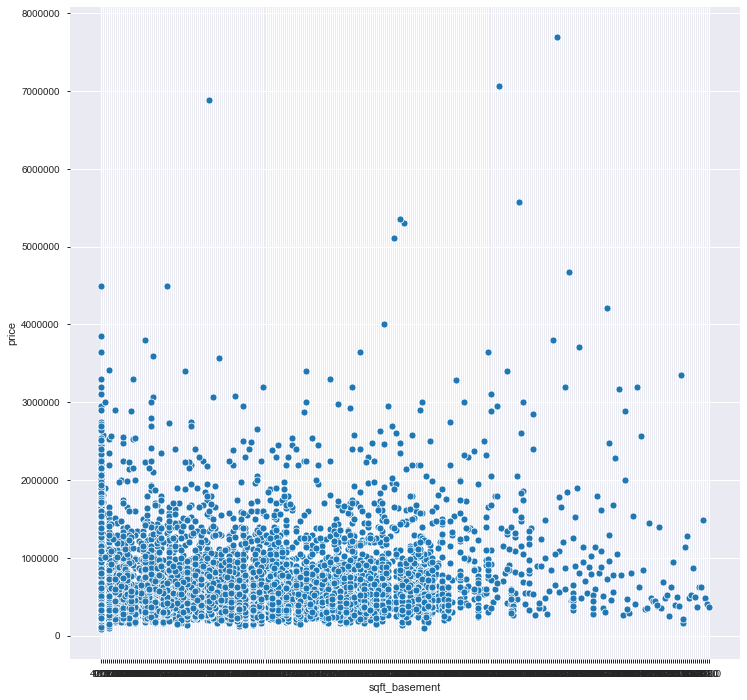

In [130]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['sqft_basement'], df['price'])

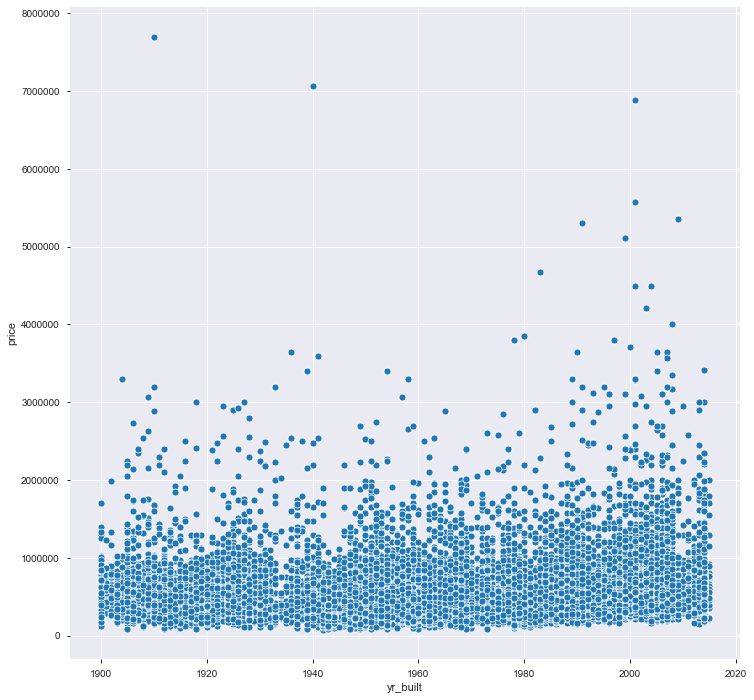

In [131]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['yr_built'], df['price'])

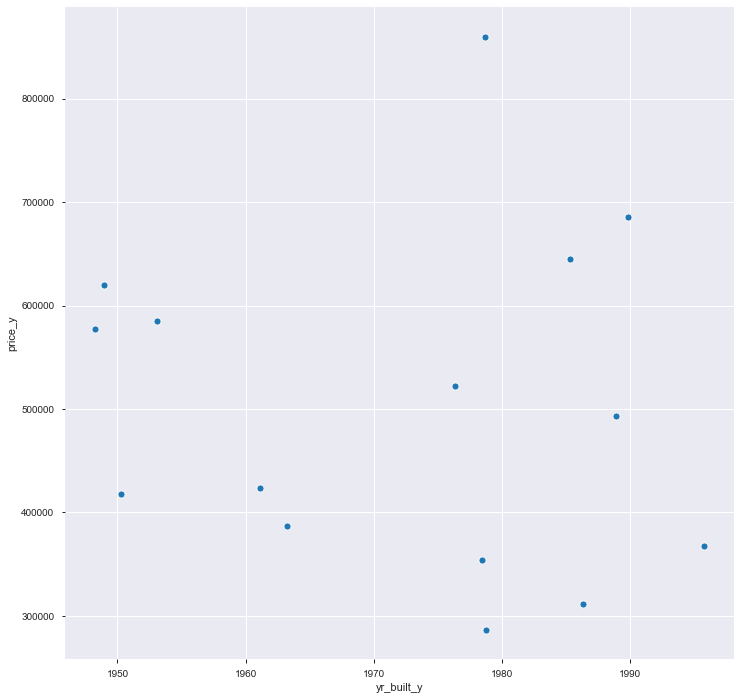

In [133]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(zip_top15_mean['yr_built_y'], zip_top15_mean['price_y'])

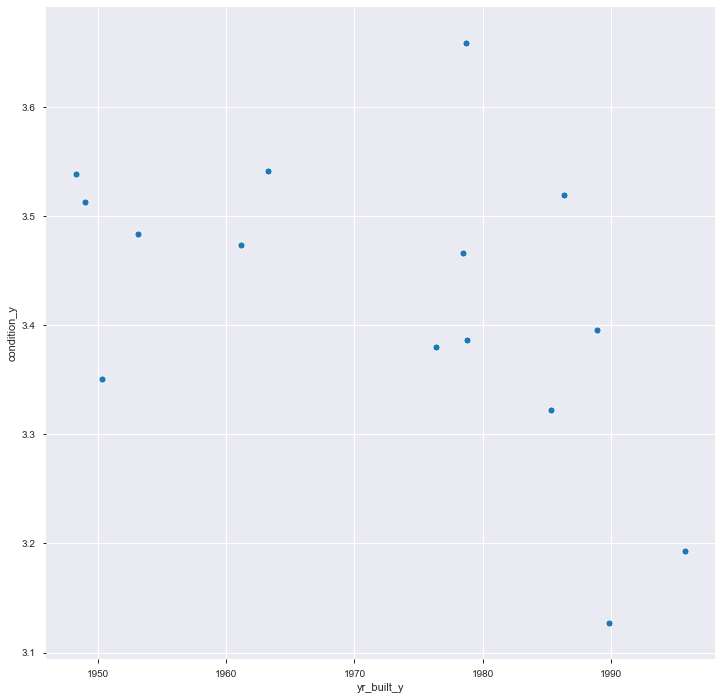

In [134]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(zip_top15_mean['yr_built_y'], zip_top15_mean['condition_y'])

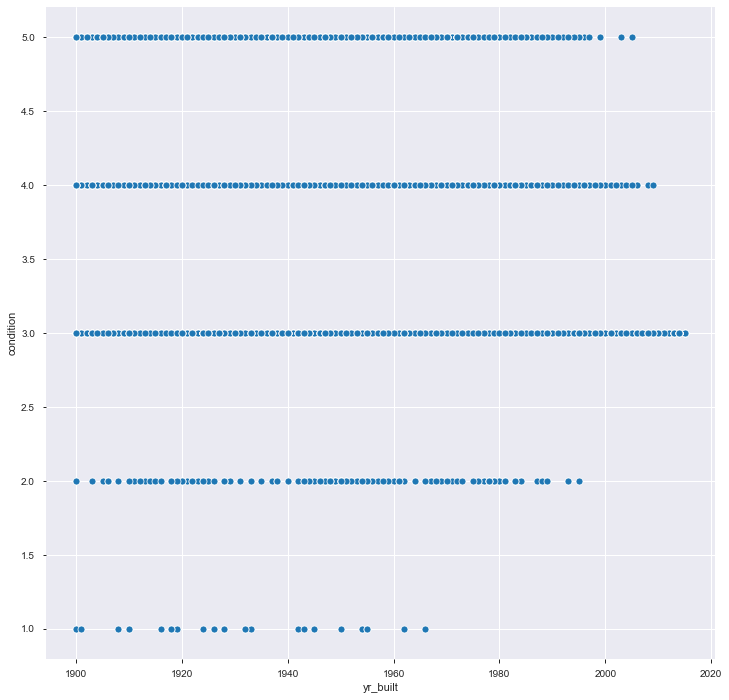

In [135]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['yr_built'], df['condition'])

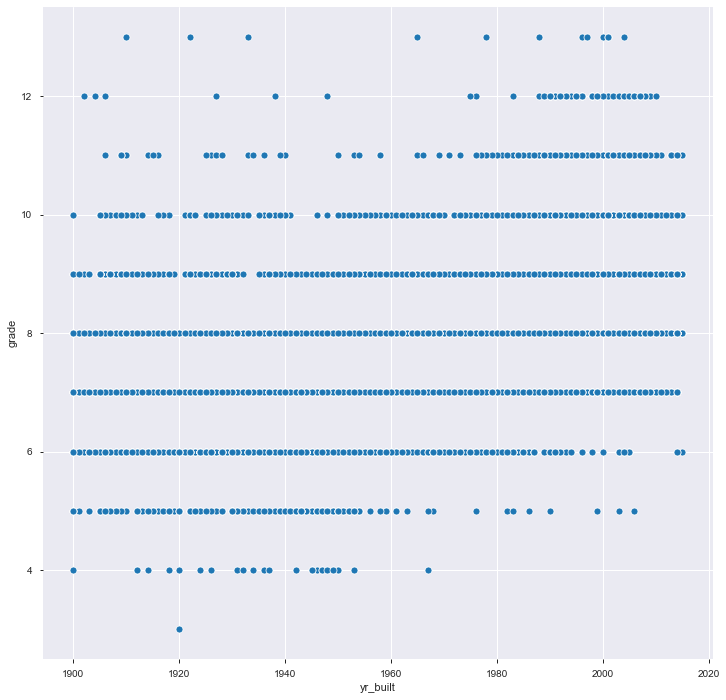

In [137]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['yr_built'], df['grade'])

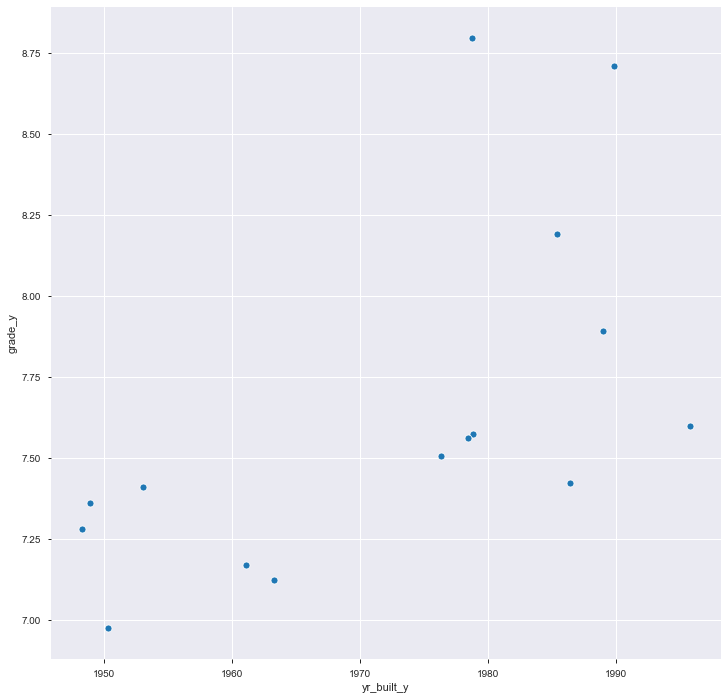

In [138]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(zip_top15_mean['yr_built_y'], zip_top15_mean['grade_y'])

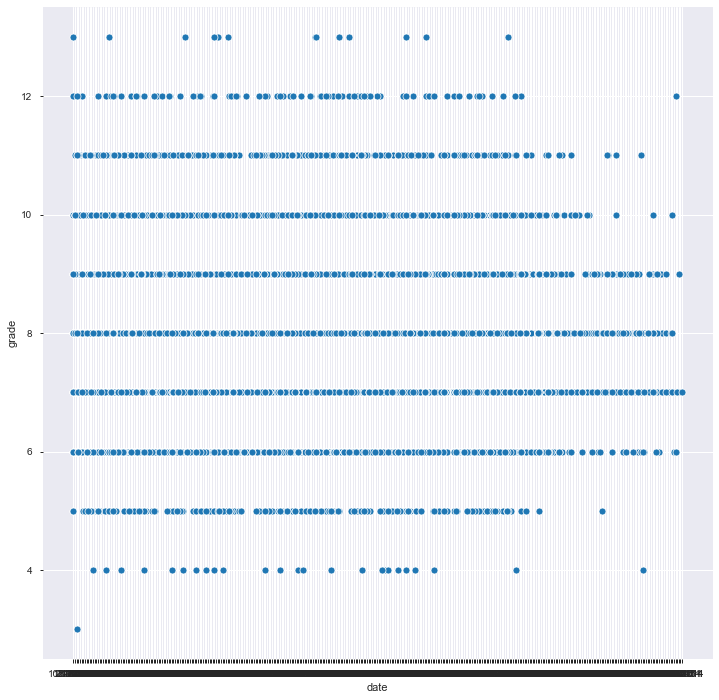

In [139]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['date'], df['grade'])

In [140]:
df.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [144]:
df['date'] = pd.to_datetime(df.date)
df_date = df.sort_values('date')

In [145]:
df_date

id       date      price  bedrooms  bathrooms  sqft_living  \
7316   2202500290 2014-05-02   435000.0         4       1.00         1450   
20586  7853361370 2014-05-02   555000.0         4       2.50         3310   
1040   7197300105 2014-05-02   550000.0         4       2.50         1940   
20543  3438501320 2014-05-02   295000.0         2       2.50         1630   
9587    472000620 2014-05-02   790000.0         3       2.50         2600   
9578   1024069009 2014-05-02   675000.0         5       2.50         2820   
11879  7305300695 2014-05-02   625000.0         4       2.50         2820   
11895  3221059036 2014-05-02   400000.0         4       2.50         3630   
4959   7525000080 2014-05-02   588500.0         3       1.75         2330   
3719   7739100015 2014-05-02   463000.0         3       1.75         1710   
3710   6127600110 2014-05-02   640000.0         4       2.00         1520   
17466  1525079056 2014-05-02   284000.0         3       1.75         1800   
1391   5100401414 2014-05-02   490000.0         2       1.00          880   
20133  2771102144 2014-05-02   385000.0         3       3.25         1320   
14075   943100683 2014-05-02   335000.0         3       2.25         1580   
13967  1818800144 2014-05-02   750000.0         3       2.50         2390   
16302  1771000430 2014-05-02   315000.0         3       1.00         1160   
4997   3390600010 2014-05-02   365000.0         3       1.00         1090   
3320   1323089184 2014-05-02   452500.0         3       2.50         2430   
19814  9267200226 2014-05-02   436110.0         3       2.50         1770   
15907  7831800460 2014-05-02   235000.0         2       1.00         1210   
7727   1962200037 2014-05-02   626000.0         3       2.25         1750   
12354   587550340 2014-05-02   604000.0         3       2.50         3240   
15542  2391600950 2014-05-02   439950.0         3       2.50         1770   
13635  5072200040 2014-05-02   403000.0         3       2.00         1960   
11565  5056500260 2014-05-02   440000.0         4       2.25         2160   
17386  7525410190 2014-05-02   550000.0         3       1.75         2910   
16754  5561000190 2014-05-02   437500.0         3       2.25         1970   
5608   2618300080 2014-05-02   242500.0         3       1.50         1200   
15113  4408100095 2014-05-02   308500.0         2       1.00          850   
...           ...        ...        ...       ...        ...          ...   
8474   7399000360 2015-05-13   330000.0         4       1.75         1720   
8185   1423200110 2015-05-13   180000.0         2       1.00          800   
16254  3025300250 2015-05-13  1620000.0         4       2.25         2350   
7343   1604590190 2015-05-13   775000.0         5       3.50         3730   
817    1922059135 2015-05-13   250000.0         2       2.00         1130   
3766   2112700600 2015-05-13   415000.0         3       2.25         1640   
8616   2568200610 2015-05-13   751000.0         5       2.75         2860   
5270   7760400480 2015-05-13   288000.0         3       2.50         1370   
17487  3764650010 2015-05-13   500000.0         3       2.50         2300   
1096   5457300478 2015-05-13   453500.0         2       1.75         1000   
837    8682262400 2015-05-13   419950.0         2       1.75         1350   
12875  2734100395 2015-05-13   380000.0         2       1.00          760   
6005   2316400285 2015-05-13   495000.0         4       3.50         2490   
18841  7327902612 2015-05-13   269500.0         2       1.00          930   
20221   642800130 2015-05-13   724500.0         3       3.25         3240   
11899  9828700685 2015-05-13   900000.0         3       1.75         1540   
17383  6815100380 2015-05-14   855000.0         3       1.75         1900   
927    8730000270 2015-05-14   359000.0         2       2.75         1370   
21434  8562790720 2015-05-14   749950.0         4       3.50         2630   
7891   1422700040 2015-05-14   183000.0         3       1.00         1170   
15797  7129

[(735324.0, 735718.0)]

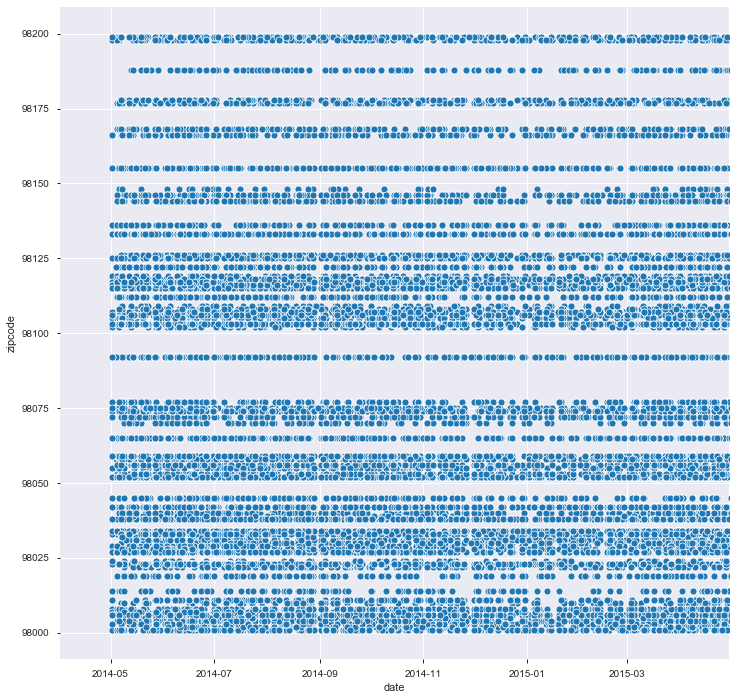

In [151]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(df['date'], df['zipcode'])
ax.set(xlim = ('2014-04-01', '2015-04-30'))

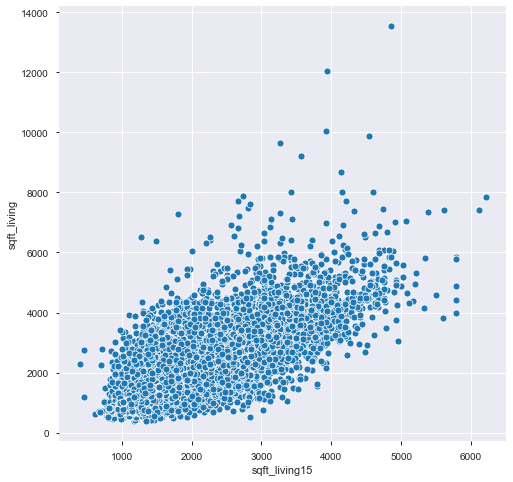

In [154]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_living15'], df['sqft_living'])

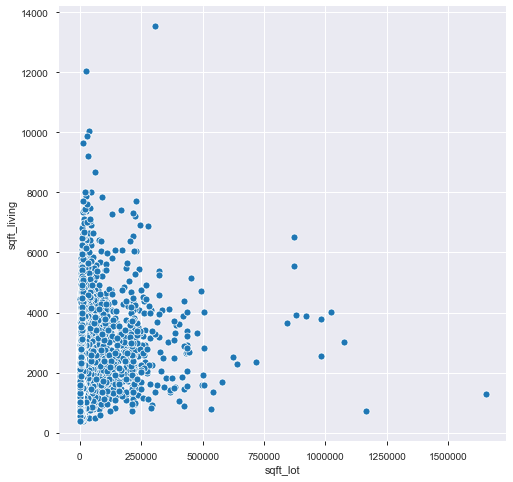

In [155]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot'], df['sqft_living'])

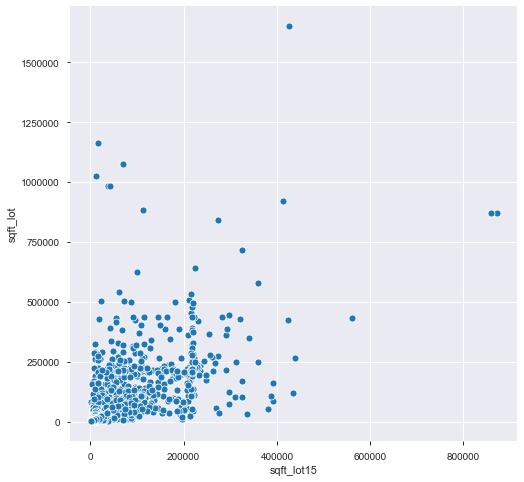

In [157]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_lot15'], df['sqft_lot'])

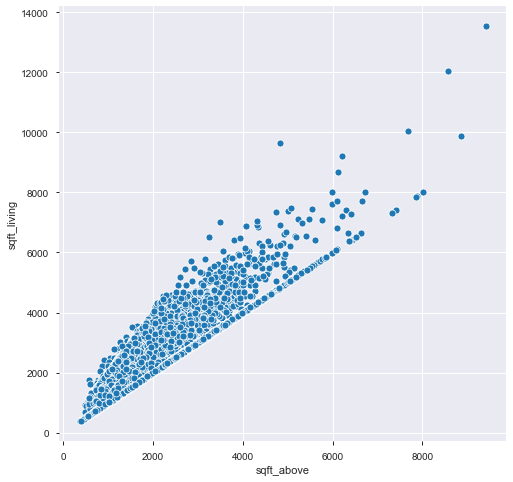

In [160]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_above'], df['sqft_living'])

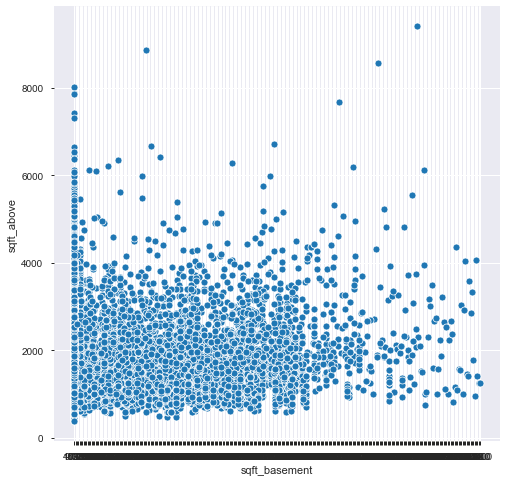

In [162]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(df['sqft_basement'], df['sqft_above'])

In [168]:
most_expensive_df = df.sort_values('price', ascending = False)

In [171]:
most_expensive_df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [235]:
most_expensive_2000 = most_expensive_df.iloc[0:2000]

In [236]:
most_expensive_2000.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020 2014-10-13  7700000.0         6       8.00        12050   
3910  9808700762 2014-06-11  7060000.0         5       4.50        10040   
9245  9208900037 2014-09-19  6890000.0         6       7.75         9890   
4407  2470100110 2014-08-04  5570000.0         5       5.75         9200   
1446  8907500070 2015-04-13  5350000.0         5       5.00         8000   

      sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
7245     27600     2.5         0.0   3.0  ...        8570         3480.0   
3910     37325     2.0         1.0   2.0  ...        7680         2360.0   
9245     31374     2.0         0.0   4.0  ...        8860         1030.0   
4407     35069     2.0         0.0   0.0  ...        6200         3000.0   
1446     23985     2.0         0.0   4.0  ...        6720         1280.0   

      yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
7245      1910       1987.0    98102  47.6298 -122.323           3940   
3910      1940       2001.0    98004  47.6500 -122.214           3930   
9245      2001          0.0    98039  47.6305 -122.240           4540   
4407      2001          NaN    98039  47.6289 -122.233           3560   
1446      2009          0.0    98004  47.6232 -122.220           4600   

      sqft_lot15                     geometry  
7245        8800  POINT (-122.32300 47.62980)  
3910       25449  POINT (-122.21400 47.65000)  
9245       42730  POINT (-122.24000 47.63050)  
4407       24345  POINT (-122.23300 47.62890)  
1446       21750  POINT (-122.22000 47.62320)  

[5 rows x 22 columns]

In [248]:
index_list=list(most_expensive_2000.index.values)

In [249]:
len(index_list)

2000

In [250]:
most_expensive_2000.waterfront.value_counts()

0.0    1689
1.0     106
Name: waterfront, dtype: int64

In [251]:
me2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list)]

In [252]:
me2000_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2000 entries, 5 to 21590
Data columns (total 22 columns):
id               2000 non-null int64
date             2000 non-null datetime64[ns]
price            2000 non-null float64
bedrooms         2000 non-null int64
bathrooms        2000 non-null float64
sqft_living      2000 non-null int64
sqft_lot         2000 non-null int64
floors           2000 non-null float64
waterfront       1795 non-null float64
view             1994 non-null float64
condition        2000 non-null int64
grade            2000 non-null int64
sqft_above       2000 non-null int64
sqft_basement    2000 non-null object
yr_built         2000 non-null int64
yr_renovated     1646 non-null float64
zipcode          2000 non-null int64
lat              2000 non-null float64
long             2000 non-null float64
sqft_living15    2000 non-null int64
sqft_lot15       2000 non-null int64
geometry         2000 non-null geometry
dtypes: datetime64[ns](1), float64(8), ge

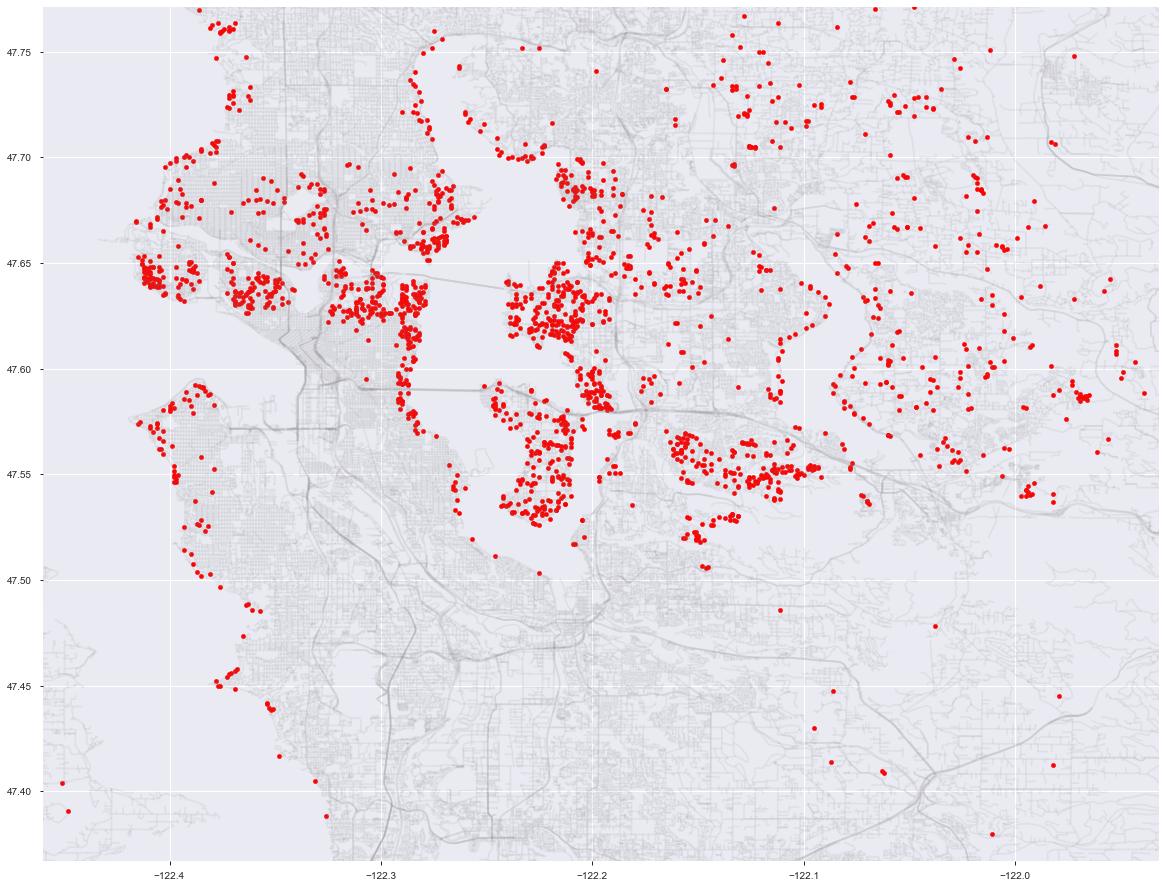

In [254]:
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='red')
# geo_df_zip15.plot(ax=ax, markersize = 10, color='blue')
minx, miny, maxx, maxy = me200_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('me200.png')

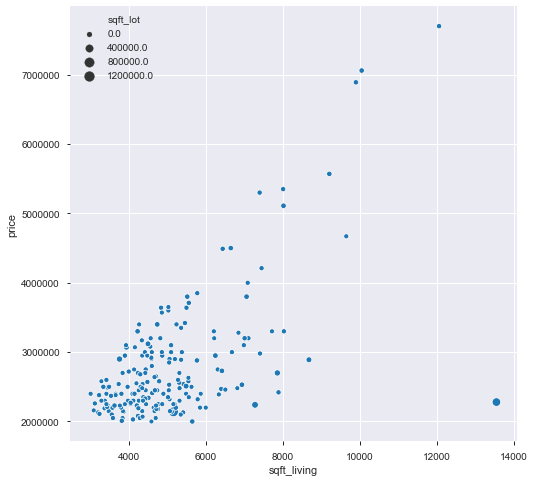

In [256]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_living'], me200_geo_df['price'], size = me200_geo_df['sqft_lot'])

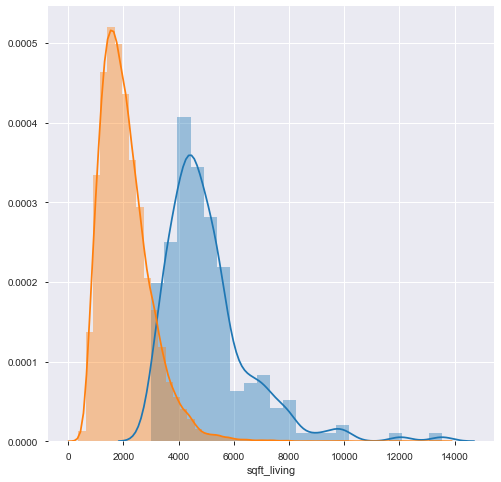

In [189]:
plt.figure(figsize = (8,8))
ax= sns.distplot(me200_geo_df['sqft_living'])
ax2 = sns.distplot(df['sqft_living'])

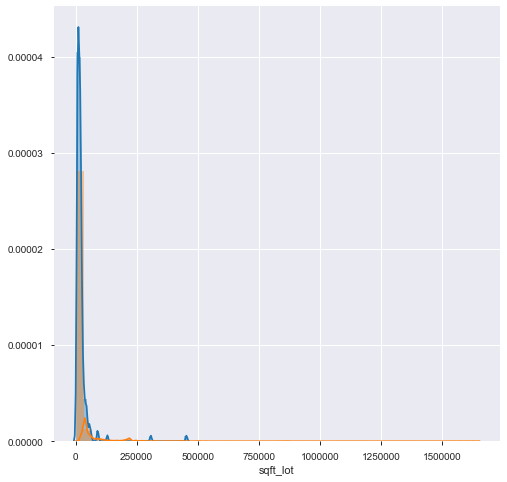

In [193]:
plt.figure(figsize = (8,8))
ax= sns.distplot(me200_geo_df['sqft_lot'])
ax2 = sns.distplot(df['sqft_lot'])

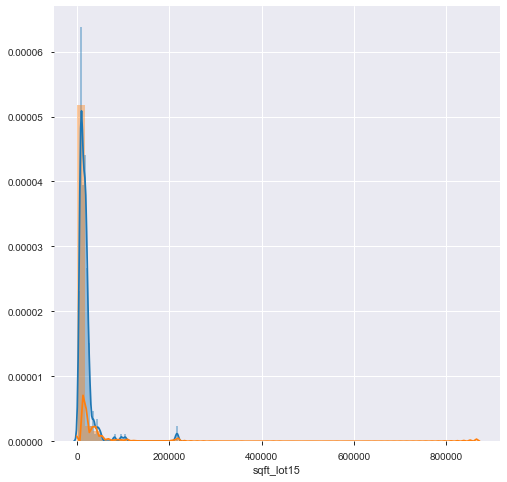

In [194]:
plt.figure(figsize = (8,8))
ax= sns.distplot(me200_geo_df['sqft_lot15'])
ax2 = sns.distplot(df['sqft_lot15'])

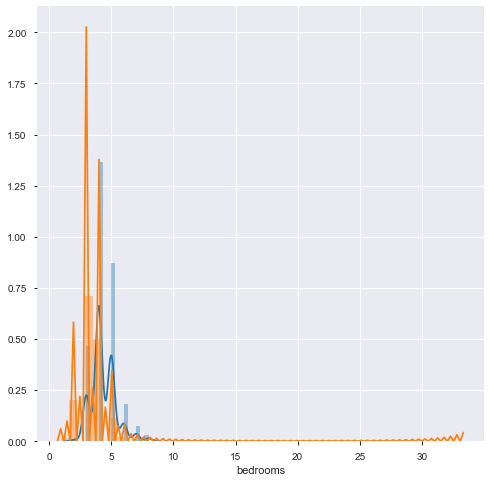

In [195]:
plt.figure(figsize = (8,8))
ax= sns.distplot(me200_geo_df['bedrooms'])
ax2 = sns.distplot(df['bedrooms'])

In [257]:
df_minus2000 = df.drop(most_expensive_2000.index, axis=0)
df_minus2000.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   
2     10000     1.0         0.0   0.0  ...         770            0.0   
3      5000     1.0         0.0   0.0  ...        1050          910.0   
4      8080     1.0         0.0   0.0  ...        1680            0.0   

   yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          0.0    98178  47.5112 -122.257           1340   
1      1951       1991.0    98125  47.7210 -122.319           1690   
2      1933          NaN    98028  47.7379 -122.233           2720   
3      1965          0.0    98136  47.5208 -122.393           1360   
4      1987          0.0    98074  47.6168 -122.045           1800   

   sqft_lot15                     geometry  
0        5650  POINT (-122.25700 47.51120)  
1        7639  POINT (-122.31900 47.72100)  
2        8062  POINT (-122.23300 47.73790)  
3        5000  POINT (-122.39300 47.52080)  
4        7503  POINT (-122.04500 47.61680)  

[5 rows x 22 columns]

In [258]:
df_sample2000 = df_minus2000.sample(n=2000, random_state = 6)
df_sample2000

id       date     price  bedrooms  bathrooms  sqft_living  \
16741  1186000095 2014-07-08  890000.0         4       2.75         2310   
13422  7937900220 2014-10-09  716500.0         5       2.75         3630   
4120   2180001080 2014-08-19  277500.0         3       2.00         1260   
9260   3034200543 2014-12-29  500000.0         3       2.25         2210   
1916   6151800135 2014-08-27  640000.0         4       1.75         2020   
16030  1592300010 2014-09-26  600000.0         5       3.50         3580   
1184   1023059324 2014-06-23  235000.0         3       1.00         1170   
10598  2767603612 2014-05-12  500000.0         2       2.25         1290   
3636   4302200535 2014-05-06  219000.0         2       1.00          900   
8976   9468200100 2014-07-10  569950.0         4       1.00         1140   
9953   1771100030 2015-01-06  335000.0         3       1.00         1120   
4953   3158500250 2014-05-14  317000.0         3       2.50         1840   
17806  7957600025 2014-05-08  245000.0         3       1.50         1260   
9209   4024101050 2014-06-02  305000.0         3       1.00          950   
5543    569000050 2014-07-03  565000.0         4       2.50         2230   
12607  6163900971 2014-06-19  352450.0         3       2.00         1430   
3753   1254200015 2015-04-08  625000.0         3       2.50         2260   
4533   7280300042 2015-04-01  650000.0         4       2.25         2330   
2411   3407700046 2014-06-24  625000.0         3       2.50         2410   
9168   2591010150 2015-04-14  405000.0         2       1.75         1350   
12501  9144100158 2014-12-29  445000.0         3       1.00         1260   
8873   8856960720 2014-08-08  280000.0         3       2.25         1860   
18096  1545806960 2015-04-22  295000.0         3       1.75         1060   
18884  7273100026 2015-04-07  682000.0         4       2.50         2390   
3159   9169600096 2014-08-01  720000.0         2       1.50         1840   
15150  2172000894 2015-04-17  225000.0         3       1.00         1250   
11375   323059208 2014-06-03  320000.0         3       2.00         1880   
1229    613400030 2014-10-24  360000.0         3       2.75         2030   
10574  3578400270 2014-06-23  430000.0         3       1.75         1300   
13145  4375700065 2014-05-12  315275.0         3       1.75         1440   
...           ...        ...       ...       ...        ...          ...   
16607  2607720440 2015-03-04  470000.0         3       2.50         1980   
6705   5652600185 2014-05-02  750000.0         3       1.75         2240   
16175  3066410080 2014-09-17  590000.0         3       2.50         2520   
4539   1568100215 2014-10-07  315000.0         2       1.00         1030   
162    7215720160 2015-03-04  900000.0         3       2.50         3400   
6273   1681400010 2014-05-19  885000.0         4       2.75         2730   
17067  3392900080 2014-07-06  625000.0         2       1.75         1990   
11357  1245001659 2014-08-21  775000.0         3       2.50         1980   
14368  1352300120 2014-05-29  262000.0         2       1.00         1500   
9455   5647900120 2014-06-13  250600.0         4       2.50         1930   
9797   7732501000 2014-06-17  854000.0         4       2.75         3150   
16482  8838900167 2014-05-09  542500.0         4       2.50         2330   
10190  3530440140 2015-05-05  276200.0         2       1.75         1370   
11143  8001100030 2015-01-02  256000.0         3       2.50         1570   
17642  2481590090 2014-10-27  598555.0         3       2.50         3040   
4530   7891600245 2015-04-22  430000.0         3       2.00         1860   
20105  9834201145 2015-02-22  635000.0         4       2.50         2880   
7259   8718500095 2015-05-07  415000.0         3       1.50         1740   
14153  2722059010 2014-06-18  568450.0         5       3.50         3260   
19586  7203150330 2014-07-17  669000.0         4       2.50         2470   
11282  4058802255 2014-07-24  219950.0         2       1.00    

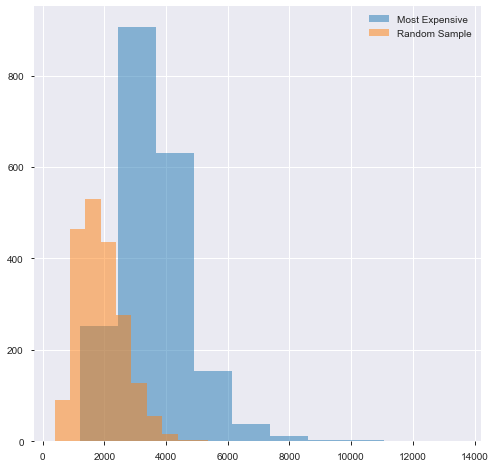

In [273]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['sqft_living'], alpha = 0.5, label = 'Most Expensive')
ax2 = plt.hist(df_sample2000['sqft_living'], alpha = 0.5, label = 'Random Sample')
plt.legend()

In [ ]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['sqft_living'], alpha = 0.5, label = 'Most Expensive')
ax2 = plt.hist(df_sample2000['sqft_living'], alpha = 0.5, label = 'Random Sample')
plt.legend()

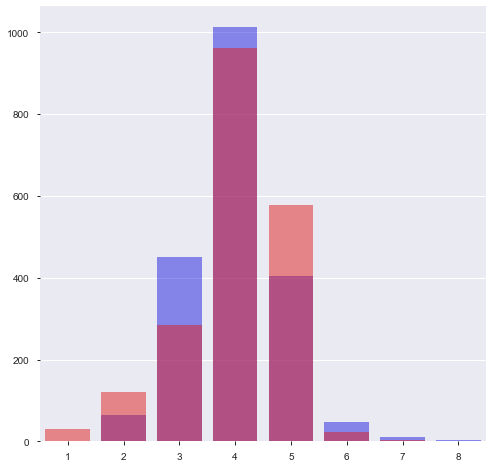

In [354]:
plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)

In [233]:
print(most_expensive_200.bedrooms.mean())
print(df_sample200.bedrooms.mean())

4.36
3.4


In [261]:
print(most_expensive_2000.bedrooms.mean())
print(df_sample2000.bedrooms.mean())

4.0275
3.28


In [288]:
list_beds1=list(me2000_geo_df.bedrooms.value_counts())
list_beds2=list(df_sample2000.bedrooms.value_counts())

In [294]:
me2000_geo_df.bedrooms.unique()

array([ 4,  3,  5,  2,  6,  7,  8,  9,  1, 10])

In [297]:
me_bed_mean = me2000_geo_df.groupby('bedrooms').mean()

In [298]:
me_bed_mean

id         price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                     
1         7.240690e+08  1.250000e+06   1.250000  1810.000000   5070.000000   
2         4.799409e+09  1.245184e+06   2.250000  2549.148936  35501.382979   
3         4.159571e+09  1.285904e+06   2.578714  2992.394678  18063.447894   
4         4.202839e+09  1.343951e+06   3.074778  3646.013820  26864.127345   
5         4.336820e+09  1.522837e+06   3.465432  4111.355556  19083.222222   
6         4.119156e+09  1.712451e+06   3.824219  4663.359375  26076.765625   
7         3.596196e+09  1.853182e+06   4.386364  5632.727273  43017.636364   
8         1.255600e+09  2.267500e+06   4.062500  5132.500000  12077.750000   
9         9.156834e+09  1.204667e+06   3.833333  3696.666667   4996.000000   
10        6.273001e+08  1.150000e+06   5.250000  4590.000000  10920.000000   

            floors  waterfront      view  condition      grade   sqft_above  \
bedrooms                                                                      
1         1.500000    1.000000  4.000000   4.000000   8.000000  1230.000000   
2         1.765957    0.255814  2.063830   3.531915   9.000000  2094.255319   
3         1.684035    0.105000  1.321508   3.490022   9.126386  2442.949002   
4         1.815400    0.033113  0.901980   3.468904   9.688055  3086.842053   
5         1.834568    0.048128  0.977667   3.419753   9.770370  3350.960494   
6         1.968750    0.074074  1.492063   3.531250   9.796875  3549.140625   
7         2.090909    0.000000  1.181818   3.363636  10.181818  4400.000000   
8         2.125000    0.000000  0.750000   4.250000   9.750000  3897.500000   
9         2.166667    0.000000  0.000000   3.000000   8.666667  2760.000000   
10        1.000000    0.000000  2.000000   3.000000   9.000000  2500.000000   

             yr_built  yr_renovated       zipcode        lat        long  \
bedrooms                                                                   
1         1967.000000      0.000000  98075.000000  47.581400 -122.081000   
2         1970.787234    248.700000  98088.808511  47.613419 -122.241000   
3         1966.858093    258.660377  98083.922395  47.621609 -122.258847   
4         1976.626851    197.302046  98066.036525  47.616766 -122.205117   
5         1979.318519    198.351351  98060.288889  47.616516 -122.203099   
6         1965.718750    301.037736  98078.406250  47.618241 -122.240625   
7         1972.636364    445.333333  98051.727273  47.617627 -122.194273   
8         1948.000000      0.000000  98058.000000  47.630725 -122.260000   
9         1916.000000    670.000000  98105.000000  47.664733 -122.301667   
10        2008.000000      0.000000  98004.000000  47.586100 -122.113000   

          sqft_living15    sqft_lot15  
bedrooms                               
1           2280.000000   5070.000000  
2           2525.297872  22248.893617  
3           2731.148559  13842.017738  
4           3034.893386  19919.999013  
5           3114.444444  15476.743210  
6           3117.890625  20157.000000  
7           3304.545455  29857.090909  
8           3592.500000  11641.250000  
9           2560.000000   4573.333333  
10          2730.000000  10400.000000

In [303]:
df_sample_bed_mean = df_sample2000.groupby('bedrooms').mean()

In [304]:
df_sample_bed_mean

id          price  bathrooms  sqft_living      sqft_lot  \
bedrooms                                                                      
1         4.614558e+09  325159.166667   1.058333   821.933333  12301.566667   
2         4.750749e+09  377876.478873   1.390845  1202.602113   7885.665493   
3         4.630619e+09  422741.560874   1.930281  1751.532778  13844.852237   
4         4.534858e+09  499426.747405   2.305363  2333.207612  15700.256055   
5         4.228518e+09  555234.125000   2.575000  2644.600000  12416.600000   
6         4.774387e+09  485078.260870   2.630435  2705.652174   8778.434783   
7         5.314967e+09  614300.000000   3.416667  4110.000000   8737.000000   
8         6.746701e+09  700000.000000   2.500000  2280.000000   3000.000000   

            floors  waterfront      view  condition     grade   sqft_above  \
bedrooms                                                                     
1         1.116667    0.035714  0.333333   3.333333  6.066667   815.266667   
2         1.315141    0.004000  0.137809   3.376761  6.852113  1077.654930   
3         1.447451    0.000000  0.129707   3.434964  7.399584  1548.559834   
4         1.594291    0.000000  0.137153   3.375433  7.783737  2050.283737   
5         1.495833    0.000000  0.183333   3.391667  7.825000  2070.000000   
6         1.391304    0.000000  0.173913   3.347826  7.391304  1982.608696   
7         1.833333    0.000000  0.000000   3.333333  7.333333  3513.333333   
8         1.500000    0.000000  0.000000   3.000000  7.000000  1210.000000   

             yr_built  yr_renovated       zipcode        lat        long  \
bedrooms                                                                   
1         1932.300000     84.695652  98104.566667  47.579820 -122.231767   
2         1958.165493     53.788288  98107.253521  47.586762 -122.279525   
3         1972.084287     70.753477  98077.003122  47.550531 -122.212157   
4         1977.333910     53.448560  98070.512111  47.540840 -122.181029   
5         1971.133333     21.802198  98067.191667  47.569615 -122.211075   
6         1964.956522      0.000000  98078.217391  47.576378 -122.249870   
7         1971.333333      0.000000  98051.000000  47.556767 -122.231667   
8         1911.000000      0.000000  98105.000000  47.667500 -122.316000   

          sqft_living15    sqft_lot15  
bedrooms                               
1           1347.533333  12815.633333  
2           1484.919014   7839.320423  
3           1784.145682  11787.544225  
4           2149.875433  13049.269896  
5           2280.558333  10406.908333  
6           1906.086957   7255.869565  
7           2090.000000   9257.000000  
8           1610.000000   3000.000000

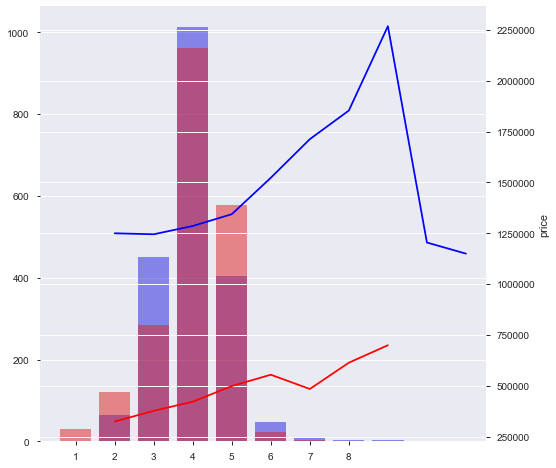

In [357]:
plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['price'],color='blue', alpha = 1 )
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['price'],color='red', alpha = 1)

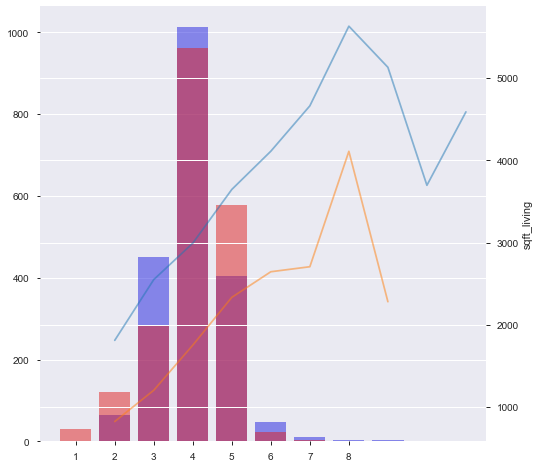

In [306]:
plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living'], alpha = 0.5)

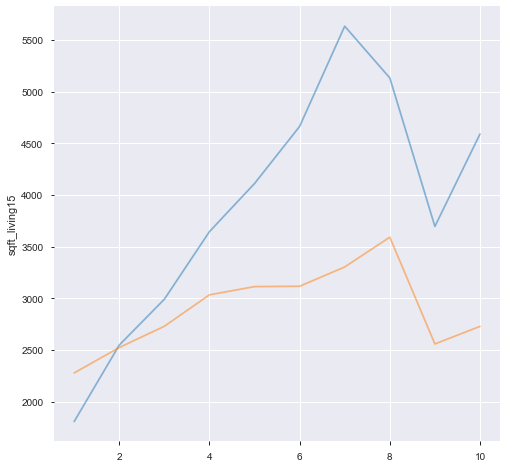

In [311]:
plt.figure(figsize = (8,8))
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living'], alpha = 0.5)
ax4= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 0.5)

In [322]:
me2000_geo_df.bedrooms.value_counts()

4     1013
3      451
5      405
6       64
2       47
7       11
8        4
9        3
10       1
1        1
Name: bedrooms, dtype: int64

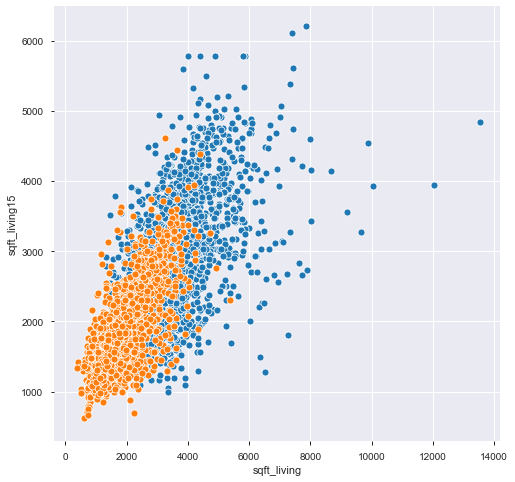

In [325]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me2000_geo_df['sqft_living'],me2000_geo_df['sqft_living15'])
ax2 = sns.scatterplot(df_sample2000['sqft_living'],df_sample2000['sqft_living15'])

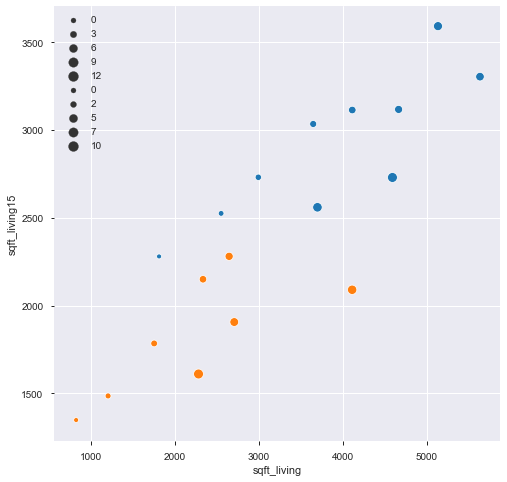

In [330]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me_bed_mean['sqft_living'],me_bed_mean['sqft_living15'], size = me_bed_mean.index.values)
ax2 = sns.scatterplot(df_sample_bed_mean['sqft_living'],df_sample_bed_mean['sqft_living15'], size = df_sample_bed_mean.index.values)

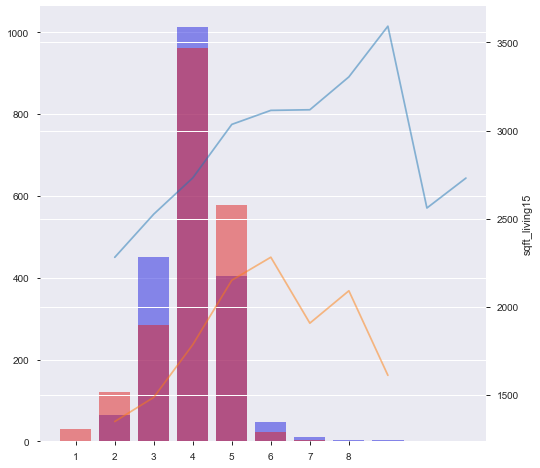

In [308]:
plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_living15'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_living15'], alpha = 0.5)

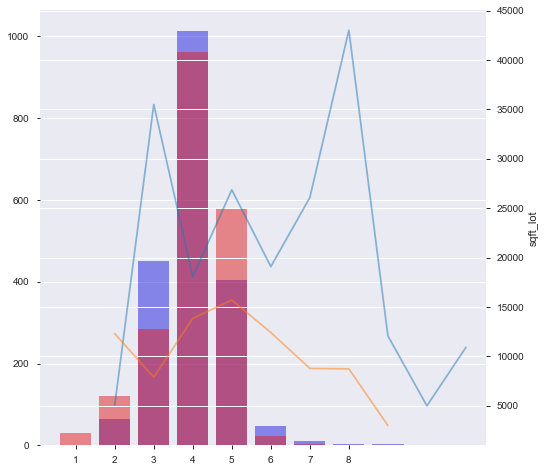

In [307]:
plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['sqft_lot'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['sqft_lot'], alpha = 0.5)

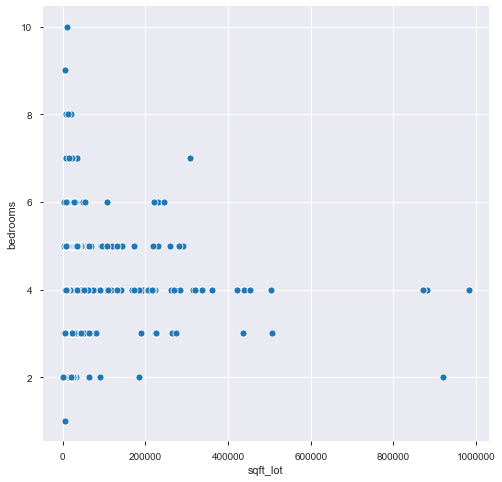

In [332]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me2000_geo_df['sqft_lot'],me2000_geo_df['bedrooms'])
# ax2 = sns.scatterplot(df_sample2000['sqft_living'],df_sample2000['sqft_living15'])

In [333]:
me_4bed = me2000_geo_df[me2000_geo_df['bedrooms'] == 4]

In [334]:
me_4bed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1013 entries, 5 to 21590
Data columns (total 22 columns):
id               1013 non-null int64
date             1013 non-null datetime64[ns]
price            1013 non-null float64
bedrooms         1013 non-null int64
bathrooms        1013 non-null float64
sqft_living      1013 non-null int64
sqft_lot         1013 non-null int64
floors           1013 non-null float64
waterfront       906 non-null float64
view             1010 non-null float64
condition        1013 non-null int64
grade            1013 non-null int64
sqft_above       1013 non-null int64
sqft_basement    1013 non-null object
yr_built         1013 non-null int64
yr_renovated     831 non-null float64
zipcode          1013 non-null int64
lat              1013 non-null float64
long             1013 non-null float64
sqft_living15    1013 non-null int64
sqft_lot15       1013 non-null int64
geometry         1013 non-null geometry
dtypes: datetime64[ns](1), float64(8), geom

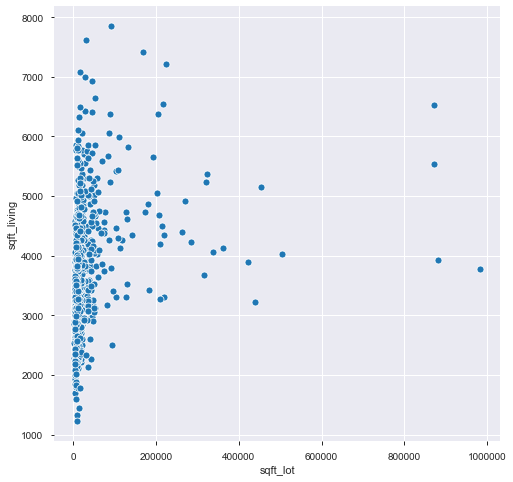

In [335]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me_4bed['sqft_lot'],me_4bed['sqft_living'])

In [338]:
me_4bed.sqft_lot.describe()

count      1013.000000
mean      26864.127345
std       72841.780799
min        1774.000000
25%        6820.000000
50%       10800.000000
75%       18745.000000
max      982998.000000
Name: sqft_lot, dtype: float64

In [339]:
me_4bed.floors.describe()

count    1013.000000
mean        1.815400
std         0.454425
min         1.000000
25%         1.500000
50%         2.000000
75%         2.000000
max         3.000000
Name: floors, dtype: float64

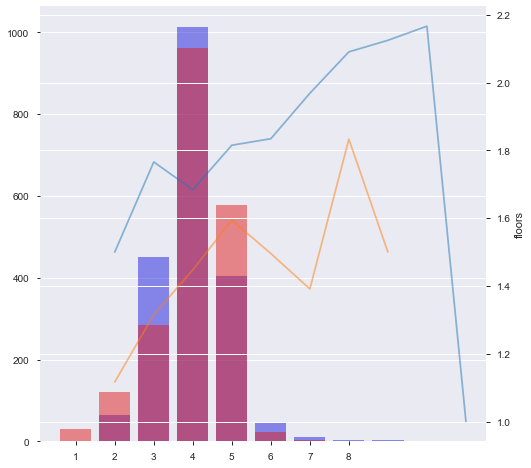

In [340]:
plt.figure(figsize = (8,8))
ax= sns.barplot(me2000_geo_df['bedrooms'].unique(), list_beds1, color = 'blue', alpha = 0.5)
ax2 = sns.barplot(df_sample2000['bedrooms'].unique(), list_beds2, color = 'red', alpha = 0.5)
ax3 = plt.twinx()
ax3= sns.lineplot(me_bed_mean.index.values, me_bed_mean['floors'], alpha = 0.5)
ax4= sns.lineplot(df_sample_bed_mean.index.values, df_sample_bed_mean['floors'], alpha = 0.5)

In [341]:
index_list2=list(df_sample2000.index.values)

In [342]:
sample2000_geo_df = geo_df[geo_df.index.map(lambda x: x in index_list2)]

In [343]:
sample2000_geo_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
8   2414600126 2015-04-15  229500.0         3        1.0         1780   
11  9212900260 2014-05-27  468000.0         2        1.0         1160   
17  6865200140 2014-05-29  485000.0         4        1.0         1600   
19  7983200060 2015-04-24  230000.0         3        1.0         1250   
30  8562750320 2014-11-10  580500.0         3        2.5         2320   

    sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
8       7470     1.0         0.0   0.0  ...        1050          730.0   
11      6000     1.0         0.0   0.0  ...         860          300.0   
17      4300     1.5         0.0   0.0  ...        1600            0.0   
19      9774     1.0         0.0   0.0  ...        1250            0.0   
30      3980     2.0         0.0   0.0  ...        2320            0.0   

    yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
8       1960          0.0    98146  47.5123 -122.337           1780   
11      1942          0.0    98115  47.6900 -122.292           1330   
17      1916          0.0    98103  47.6648 -122.343           1610   
19      1969          0.0    98003  47.3343 -122.306           1280   
30      2003          0.0    98027  47.5391 -122.070           2580   

    sqft_lot15                     geometry  
8         8113  POINT (-122.33700 47.51230)  
11        6000  POINT (-122.29200 47.69000)  
17        4300  POINT (-122.34300 47.66480)  
19        8850  POINT (-122.30600 47.33430)  
30        3980  POINT (-122.07000 47.53910)  

[5 rows x 22 columns]

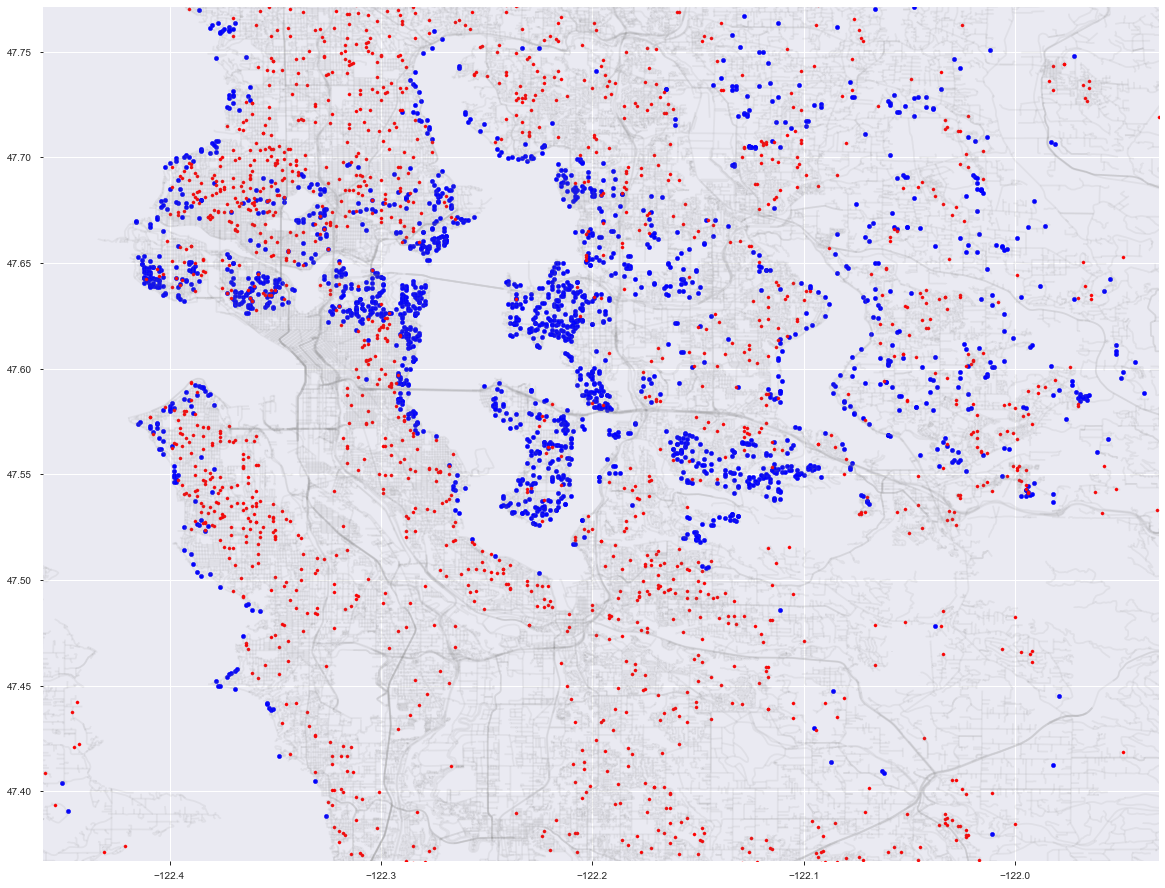

In [344]:
fig, ax = plt.subplots(figsize = (20,20))
street_map.plot(ax =ax, alpha = 0.1, color = "grey")
me2000_geo_df.plot(ax=ax, markersize = 20, color='blue')
sample2000_geo_df.plot(ax=ax, markersize = 10, color='red')
minx, miny, maxx, maxy = me200_geo_df.total_bounds
ax.set_xlim(minx-0.05, maxx+0.05)
ax.set_ylim(miny-0.05, maxy+0.01)
plt.savefig('me2000andsample2000.png')

In [345]:
me2000_geo_df.price.describe()

count    2.000000e+03
mean     1.380852e+06
std      5.968453e+05
min      9.095000e+05
25%      9.987250e+05
50%      1.200000e+06
75%      1.530000e+06
max      7.700000e+06
Name: price, dtype: float64

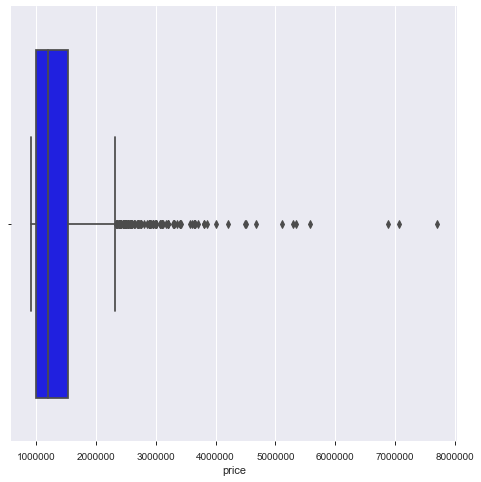

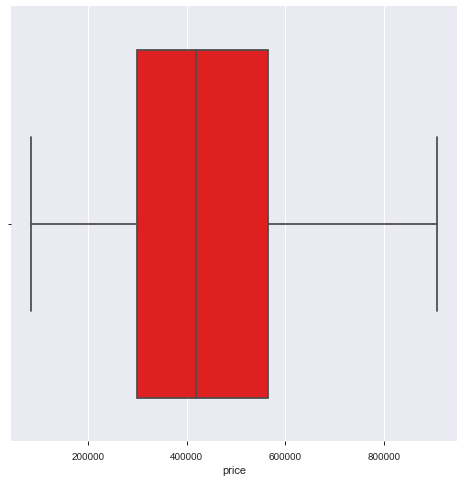

In [353]:
ax=plt.figure(figsize = (8,8))
ax= sns.boxplot(me2000_geo_df['price'], color = 'blue')
ax2=plt.figure(figsize = (8,8))
ax2 = sns.boxplot(df_sample2000['price'], color = 'red')


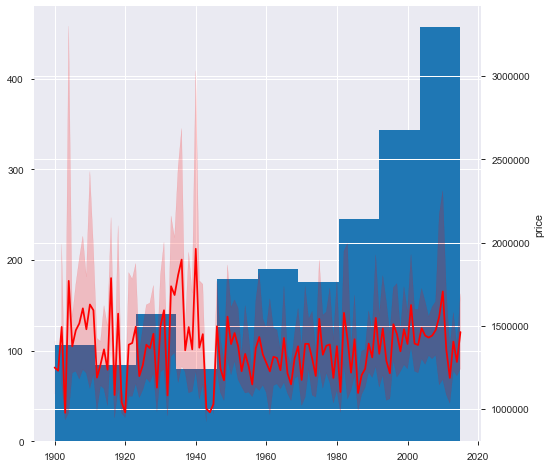

In [372]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['yr_built'], me2000_geo_df['price'],color='red', alpha = 1 )
# ax2 = plt.hist(df_sample2000['sqft_living'], alpha = 0.5, label = 'Random Sample')


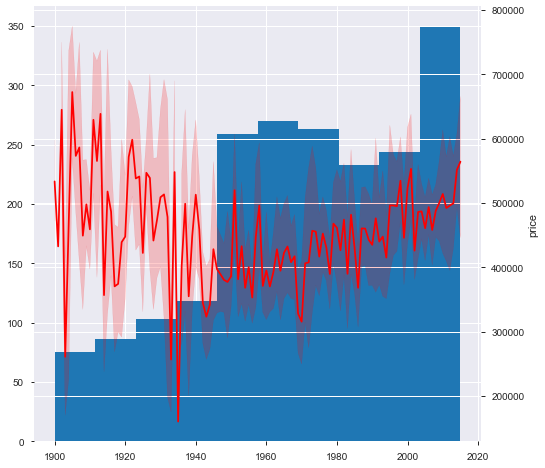

In [373]:
plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['price'],color='red', alpha = 1) 

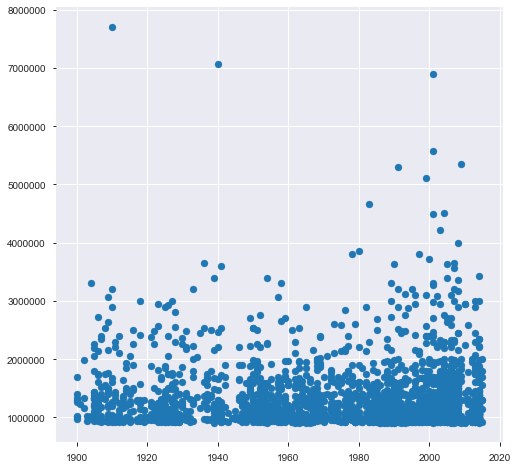

In [374]:
plt.figure(figsize = (8,8))
ax= plt.scatter(me2000_geo_df['yr_built'],me2000_geo_df['price'],alpha = 1, label = 'Most Expensive')

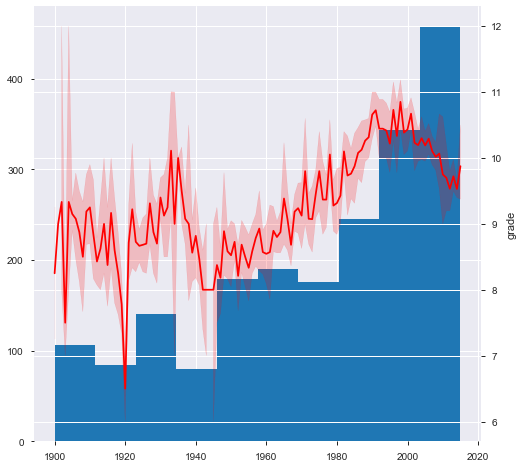

In [375]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['yr_built'], me2000_geo_df['grade'],color='red', alpha = 1 )

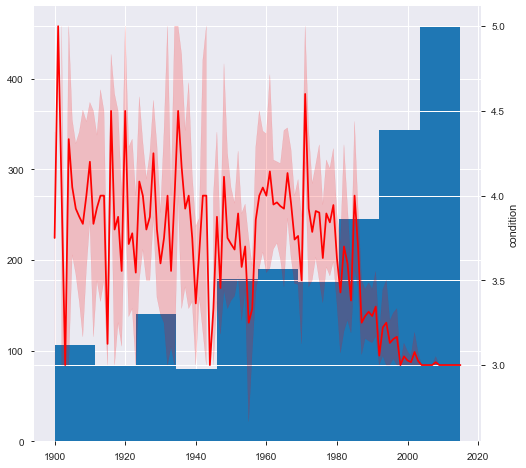

In [378]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['yr_built'], me2000_geo_df['condition'],color='red', alpha = 1 )

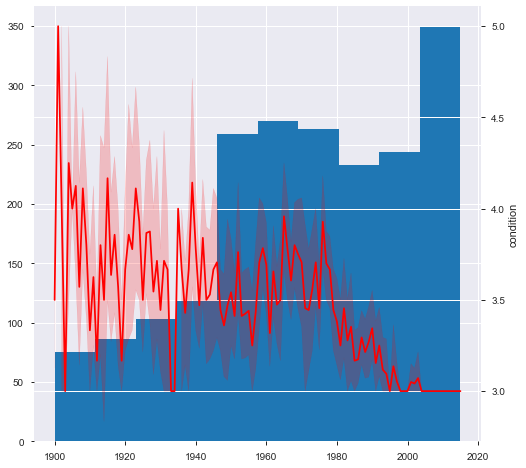

In [379]:
plt.figure(figsize = (8,8))
ax= plt.hist(df_sample2000['yr_built'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(df_sample2000['yr_built'], df_sample2000['condition'],color='red', alpha = 1) 

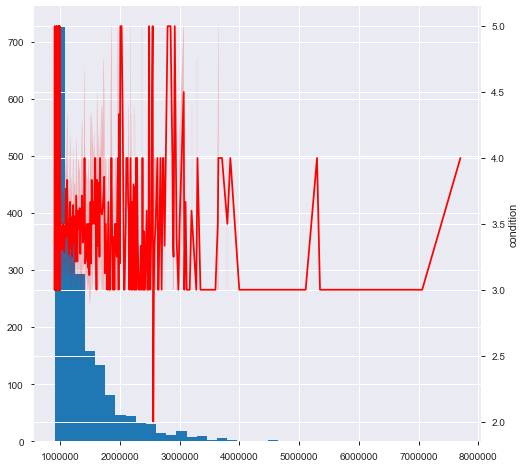

In [382]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['price'], alpha = 1, bins = 40, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['price'], me2000_geo_df['condition'],color='red', alpha = 1 )

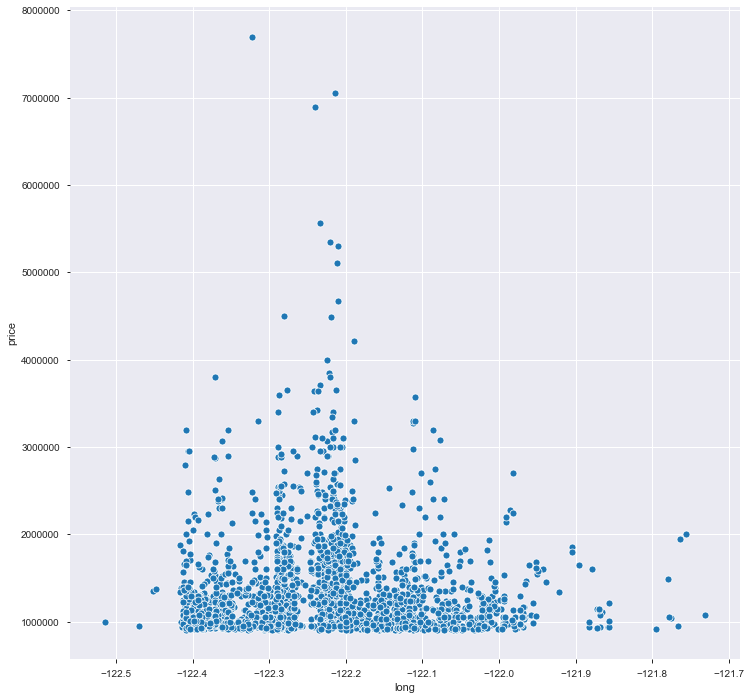

In [384]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(me2000_geo_df['long'], me2000_geo_df['price'])

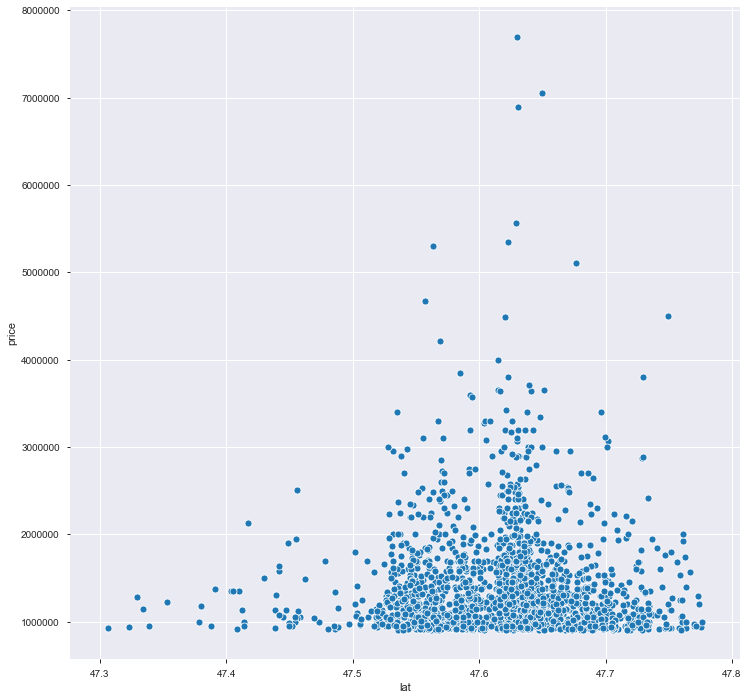

In [385]:
plt.figure(figsize = (12,12))
ax= sns.scatterplot(me2000_geo_df['lat'], me2000_geo_df['price'])

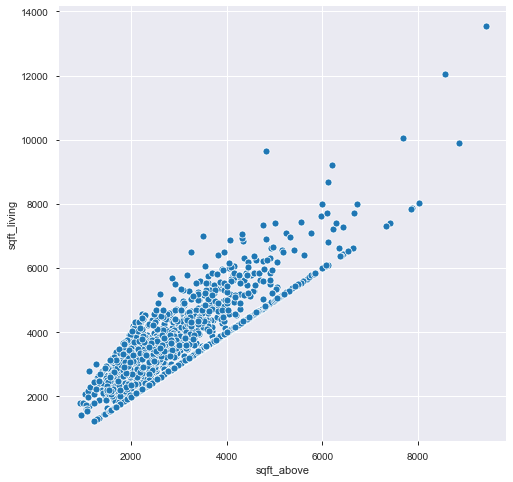

In [386]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_above'], me2000_geo_df['sqft_living'])

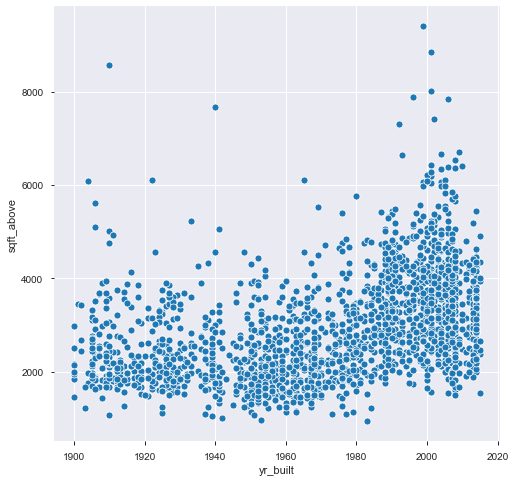

In [389]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['yr_built'], me2000_geo_df['sqft_above'])

In [390]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [391]:
f = 'sqft_above~yr_built'
model = ols(f, data = me2000_geo_df).fit()

In [392]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     486.0
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           1.39e-96
Time:                        12:26:24   Log-Likelihood:                -16609.
No. Observations:                2000   AIC:                         3.322e+04
Df Residuals:                    1998   BIC:                         3.323e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.639e+04   1333.123    -19.797      0.000    -2.9e+04   -2.38e+04
yr_built      14.8838      0.675     22.046      0.000      13.560      16.208
==============================================================================
Omnibus:                      470.436   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1467.799
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                       6.475   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

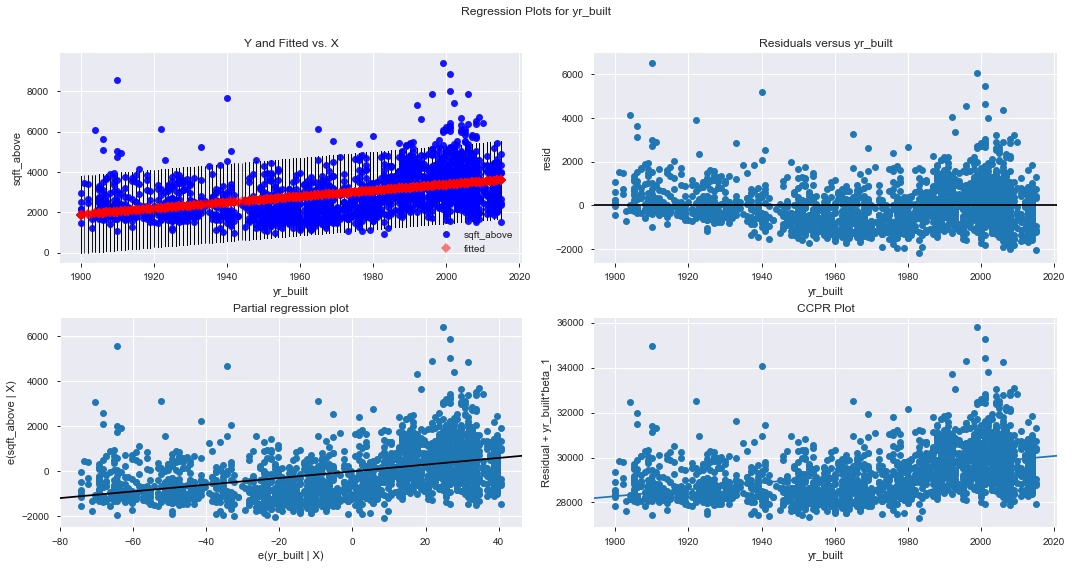

In [393]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_built", fig=fig)
plt.show()

In [394]:
sqftliving = 'sqft_living15~sqft_living'
model = ols(sqftliving, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     667.7
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          2.91e-127
Time:                        12:31:30   Log-Likelihood:                -16014.
No. Observations:                2000   AIC:                         3.203e+04
Df Residuals:                    1998   BIC:                         3.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1649.4435     53.796     30.661      0.000    1543.942    1754.946
sqft_living     0.3667      0.014     25.840      0.000       0.339       0.395
==============================================================================
Omnibus:                        2.546   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.539
Skew:                          -0.049   Prob(JB):                        0.281
Kurtosis:                       3.144   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

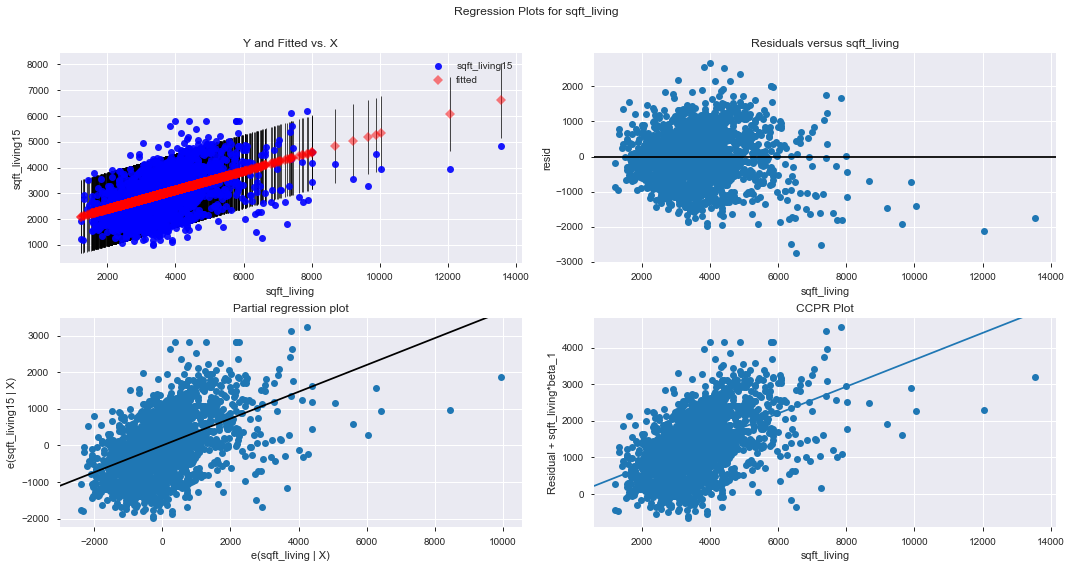

In [395]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [403]:
sqftprice = 'sqft_living~price'
model = ols(sqftprice, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     953.8
Date:                Sat, 19 Oct 2019   Prob (F-statistic):          1.50e-171
Time:                        12:35:32   Log-Likelihood:                -16534.
No. Observations:                2000   AIC:                         3.307e+04
Df Residuals:                    1998   BIC:                         3.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2106.7081     53.138     39.646      0.000    2002.496    2210.920
price          0.0011   3.53e-05     30.883      0.000       0.001       0.001
==============================================================================
Omnibus:                      466.824   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2077.323
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       7.530   Cond. No.                     3.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

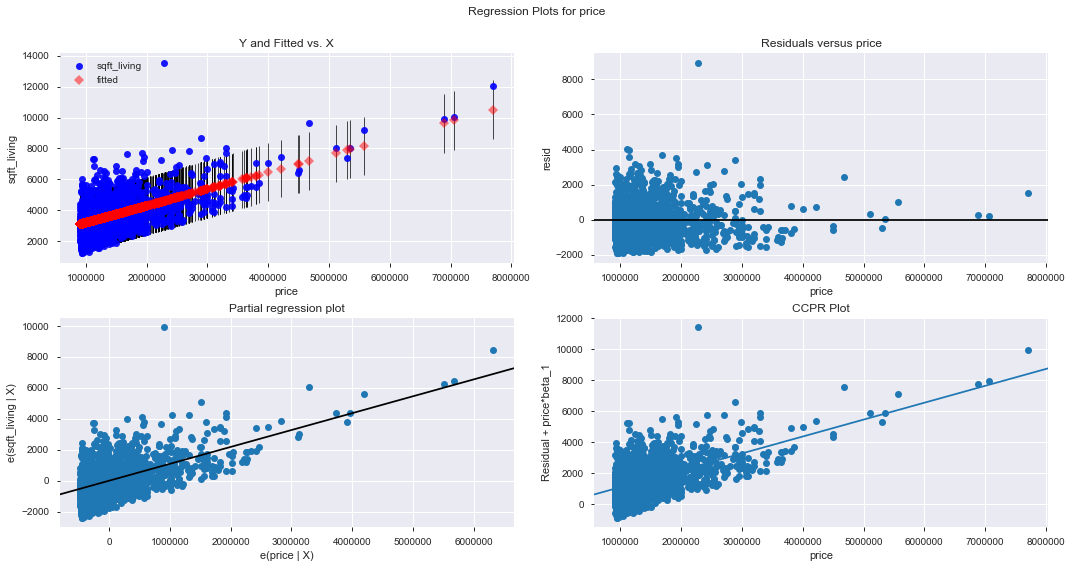

In [404]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "price", fig=fig)
plt.show()

In [ ]:
plt.figure(figsize = (8,8))
ax = sns.scatterplot(me_bed_mean['sqft_living'],me_bed_mean['sqft_living15'], size = me_bed_mean.index.values)
ax2 = sns.scatterplot(df_sample_bed_mean['sqft_living'],df_sample_bed_mean['sqft_living15'], size = df_sample_bed_mean.index.values)

In [406]:
sqftlivingmean = 'sqft_living15~sqft_living'
model = ols(sqftlivingmean, data = me_bed_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     20.09
Date:                Sat, 19 Oct 2019   Prob (F-statistic):            0.00205
Time:                        12:48:10   Log-Likelihood:                -67.341
No. Observations:                  10   AIC:                             138.7
Df Residuals:                       8   BIC:                             139.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1790.5642    257.565      6.952      0.000    1196.618    2384.511
sqft_living     0.2855      0.064      4.482      0.002       0.139       0.432
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.303
Skew:                          -0.295   Prob(JB):                        0.860
Kurtosis:                       2.385   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

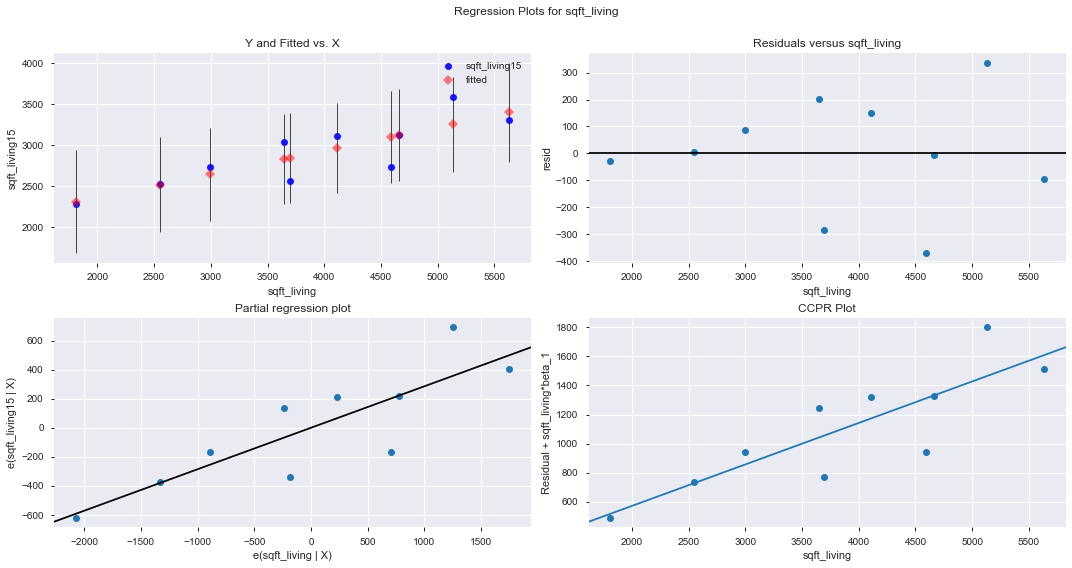

In [407]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [409]:
sqftlivingsamplemean = 'sqft_living15~sqft_living'
model = ols(sqftlivingsamplemean, data = df_sample_bed_mean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_living15   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     7.905
Date:                Sat, 19 Oct 2019   Prob (F-statistic):             0.0307
Time:                        12:51:07   Log-Likelihood:                -53.945
No. Observations:                   8   AIC:                             111.9
Df Residuals:                       6   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1278.0463    213.984      5.973      0.001     754.447    1801.645
sqft_living     0.2481      0.088      2.812      0.031       0.032       0.464
==============================================================================
Omnibus:                        1.333   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.893
Skew:                           0.608   Prob(JB):                        0.640
Kurtosis:                       1.904   Cond. No.                     6.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

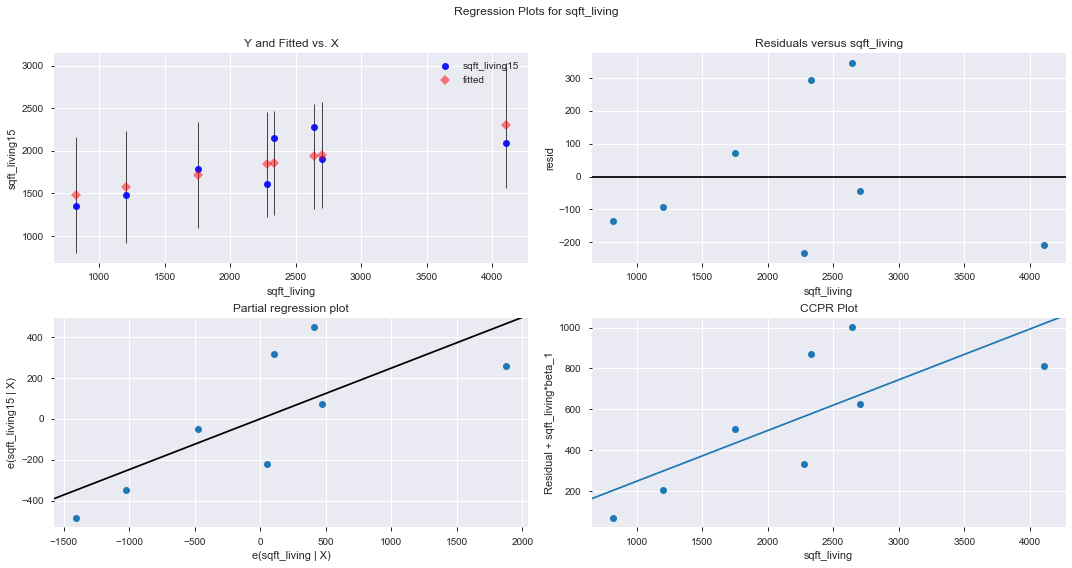

In [410]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [415]:
dups = me2000_geo_df[me2000_geo_df.duplicated(subset='id')]

In [416]:
dups

id       date      price  bedrooms  bathrooms  sqft_living  \
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
2563   7856400240 2015-02-11  1650000.0         4       3.00         3900   
4918   9809000020 2015-03-13  1940000.0         5       2.25         3120   
7839   4139420590 2014-08-27  1200000.0         4       3.50         4560   
13722  5332200530 2015-04-24  1020000.0         5       2.50         2350   
14295  3528000040 2015-03-26  1800000.0         3       3.25         5290   
15999  5536100020 2015-05-12  1190000.0         3       2.00         2160   
18977  7856400300 2015-03-22  1510000.0         2       2.50         3180   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
314       12103     1.0         0.0   3.0  ...        2690         1600.0   
2563       9750     1.0         NaN   4.0  ...        2520         1380.0   
4918      16672     2.0         0.0   0.0  ...        3120            0.0   
7839      16643     1.0         0.0   3.0  ...        2230         2330.0   
13722      4000     2.0         0.0   0.0  ...        2350            0.0   
14295    224442     2.0         0.0   0.0  ...        4540          750.0   
15999     15788     1.0         0.0   0.0  ...        2160            0.0   
18977      9400     2.0         0.0   4.0  ...        2610          570.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
314        1997          0.0    98006  47.5503 -122.102           3860   
2563       1972          0.0    98006  47.5605 -122.158           3410   
4918       1969          0.0    98004  47.6458 -122.219           3740   
7839       1995          0.0    98006  47.5521 -122.115           4060   
13722      1993          NaN    98112  47.6265 -122.296           1840   
14295      1988          0.0    98053  47.6671 -122.051           3750   
15999      1951          0.0    98004  47.6227 -122.207           2260   
18977      1985          0.0    98006  47.5617 -122.158           3760   

       sqft_lot15                     geometry  
314         11244  POINT (-122.10200 47.55030)  
2563         9450  POINT (-122.15800 47.56050)  
4918        17853  POINT (-122.21900 47.64580)  
7839        15177  POINT (-122.11500 47.55210)  
13722        4000  POINT (-122.29600 47.62650)  
14295       84936  POINT (-122.05100 47.66710)  
15999        9787  POINT (-122.20700 47.62270)  
18977        9450  POINT (-122.15800 47.56170)  

[8 rows x 22 columns]

In [420]:
me2000_geo_df.zipcode.value_counts()

98004    216
98040    173
98006    161
98112    136
98033    106
98199     84
98105     71
98075     66
98115     56
98053     52
98119     51
98074     49
98039     47
98052     46
98005     43
98177     41
98144     40
98103     37
98116     36
98109     35
98059     35
98027     33
98102     33
98117     32
98034     31
98122     31
98077     25
98008     24
98072     23
98029     20
98136     16
98166     16
98125     14
98118     13
98007     12
98065     11
98024     10
98146     10
98107      8
98155      7
98045      7
98056      6
98014      5
98070      4
98028      4
98038      4
98019      3
98058      3
98198      3
98126      3
98023      2
98178      2
98011      1
98010      1
98092      1
98003      1
Name: zipcode, dtype: int64

(array([467., 430., 149., 178.,   1., 508.,  64.,  57.,  59.,  87.]),
 array([98003. , 98022.6, 98042.2, 98061.8, 98081.4, 98101. , 98120.6,
        98140.2, 98159.8, 98179.4, 98199. ]),
 <a list of 10 Patch objects>)

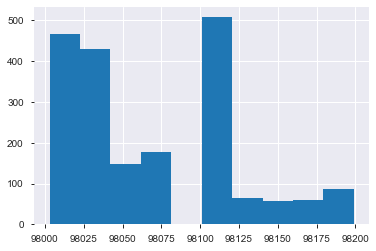

In [422]:
plt.hist(me2000_geo_df['zipcode'])

In [423]:
id_list = list(dups.id.values)

In [424]:
id_list

[4139480200,
 7856400240,
 9809000020,
 4139420590,
 5332200530,
 3528000040,
 5536100020,
 7856400300]

In [434]:
dups_df = me2000_geo_df[me2000_geo_df.id.map(lambda x: x in id_list)]
dups_df

id       date      price  bedrooms  bathrooms  sqft_living  \
313    4139480200 2014-06-18  1380000.0         4       3.25         4290   
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
2562   7856400240 2014-06-27  1620000.0         4       3.00         3900   
2563   7856400240 2015-02-11  1650000.0         4       3.00         3900   
4917   9809000020 2014-05-13  1900000.0         5       2.25         3120   
4918   9809000020 2015-03-13  1940000.0         5       2.25         3120   
7838   4139420590 2014-05-20  1210000.0         4       3.50         4560   
7839   4139420590 2014-08-27  1200000.0         4       3.50         4560   
13721  5332200530 2014-06-13   910000.0         5       2.50         2350   
13722  5332200530 2015-04-24  1020000.0         5       2.50         2350   
14294  3528000040 2014-10-01  1690000.0         3       3.25         5290   
14295  3528000040 2015-03-26  1800000.0         3       3.25         5290   
15998  5536100020 2014-12-15   987000.0         3       2.00         2160   
15999  5536100020 2015-05-12  1190000.0         3       2.00         2160   
18976  7856400300 2014-07-02  1410000.0         2       2.50         3180   
18977  7856400300 2015-03-22  1510000.0         2       2.50         3180   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
313       12103     1.0         0.0   3.0  ...        2690         1600.0   
314       12103     1.0         0.0   3.0  ...        2690         1600.0   
2562       9750     1.0         0.0   4.0  ...        2520         1380.0   
2563       9750     1.0         NaN   4.0  ...        2520         1380.0   
4917      16672     2.0         0.0   0.0  ...        3120            0.0   
4918      16672     2.0         0.0   0.0  ...        3120            0.0   
7838      16643     1.0         0.0   3.0  ...        2230         2330.0   
7839      16643     1.0         0.0   3.0  ...        2230         2330.0   
13721      4000     2.0         0.0   0.0  ...        2350            0.0   
13722      4000     2.0         0.0   0.0  ...        2350            0.0   
14294    224442     2.0         0.0   0.0  ...        4540          750.0   
14295    224442     2.0         0.0   0.0  ...        4540          750.0   
15998     15788     1.0         0.0   0.0  ...        2160            0.0   
15999     15788     1.0         0.0   0.0  ...        2160            0.0   
18976      9400     2.0         0.0   4.0  ...        2610          570.0   
18977      9400     2.0         0.0   4.0  ...        2610          570.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
313        1997          0.0    98006  47.5503 -122.102           3860   
314        1997          0.0    98006  47.5503 -122.102           3860   
2562       1972          0.0    98006  47.5605 -122.158           3410   
2563       1972          0.0    98006  47.5605 -122.158           3410   
4917       1969          NaN    98004  47.6458 -122.219           3740   
4918       1969          0.0    98004  47.6458 -122.219           3740   
7838       1995          0.0    98006  47.5521 -122.115           4060   
7839       1995          0.0    98006  47.5521 -122.115           4060   
13721      1993          0.0    98112  47.6265 -122.296           1840   
13722      1993          NaN    98112  47.6265 -122.296           1840   
14294      1988          0.0    98053  47.6671 -122.051           3750   
14295      1988          0.0    98053  47.6671 -122.051           3750   
15998      1951          0.0    98004  47.6227 -122.207           2260   
15999      1951          0.0    98004  47.6227 -122.207           2260   
18976      1985          0.0    98006  47.5617 -122.158           3760   
18977      1985          0.0    98006  47.5617 -122.158           3760   

       sqft_lot15                     geometry  
313         11244  POINT (-122.10200 47.55030)  
314         11244  POINT (-122.10200 4

In [433]:
list_dups=list(dups_df.price)
list_dups
dups_diff = [i for i in range(0,len(list_dups) if)]

[1380000.0,
 1400000.0,
 1620000.0,
 1650000.0,
 1900000.0,
 1940000.0,
 1210000.0,
 1200000.0,
 910000.0,
 1020000.0,
 1690000.0,
 1800000.0,
 987000.0,
 1190000.0,
 1410000.0,
 1510000.0]

In [436]:
dups_diff=[]
for i in range(0,len(list_dups)):
    if i % 2 != 0:
        dups_diff.append(list_dups[i]- list_dups[i-1])

In [439]:
dups_diff

[20000.0, 30000.0, 40000.0, -10000.0, 110000.0, 110000.0, 203000.0, 100000.0]

In [441]:
import numpy as np
np.mean(dups_diff)

75375.0

In [429]:
dups_sample = df_sample2000[df_sample2000.duplicated(subset='id')]
dups_sample

id       date     price  bedrooms  bathrooms  sqft_living  \
1863   2143700830 2015-03-12  370000.0         4        2.5         2100   
20037  8648900110 2014-05-05  555000.0         3        2.5         1940   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
1863      19680     1.5         0.0   0.0  ...        2100            0.0   
20037      3211     2.0         0.0   0.0  ...        1940            0.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
1863       1914          0.0    98055  47.4787 -122.230           1340   
20037      2009          0.0    98027  47.5644 -122.093           1880   

       sqft_lot15                     geometry  
1863        12300  POINT (-122.23000 47.47870)  
20037        3078  POINT (-122.09300 47.56440)  

[2 rows x 22 columns]

In [442]:
me2000_geo_df.yr_renovated.unique()

array([   0.,   nan, 2010., 1992., 1991., 1994., 2003., 2014., 1998.,
       1990., 2007., 2006., 2013., 1968., 2002., 2008., 1995., 1963.,
       2005., 1977., 1999., 2001., 1997., 1993., 2000., 1956., 1983.,
       1980., 1987., 1996., 2009., 2004., 2015., 1989., 2012., 1984.,
       1988., 1985., 1986., 1982., 1979., 1958., 1965.])

In [449]:
me2000_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2000 entries, 5 to 21590
Data columns (total 22 columns):
id               2000 non-null int64
date             2000 non-null datetime64[ns]
price            2000 non-null float64
bedrooms         2000 non-null int64
bathrooms        2000 non-null float64
sqft_living      2000 non-null int64
sqft_lot         2000 non-null int64
floors           2000 non-null float64
waterfront       1795 non-null float64
view             1994 non-null float64
condition        2000 non-null int64
grade            2000 non-null int64
sqft_above       2000 non-null int64
sqft_basement    2000 non-null object
yr_built         2000 non-null int64
yr_renovated     1646 non-null float64
zipcode          2000 non-null int64
lat              2000 non-null float64
long             2000 non-null float64
sqft_living15    2000 non-null int64
sqft_lot15       2000 non-null int64
geometry         2000 non-null geometry
dtypes: datetime64[ns](1), float64(8), ge

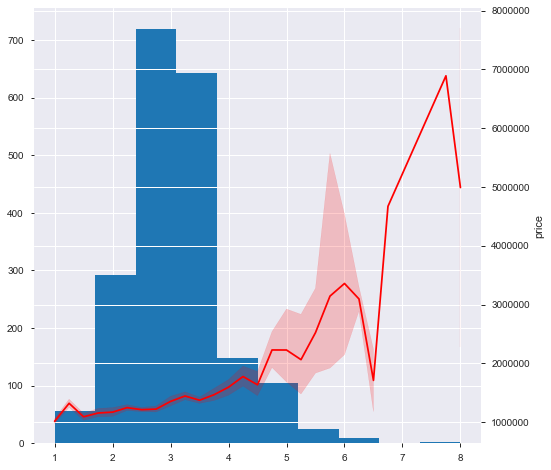

In [447]:
plt.figure(figsize = (8,8))
ax= plt.hist(me2000_geo_df['bathrooms'], alpha = 1, label = 'Most Expensive')
ax3 = plt.twinx()
ax3= sns.lineplot(me2000_geo_df['bathrooms'], me2000_geo_df['price'],color='red', alpha = 1 )

In [461]:
me2000_geo_df['sqft_basement'].value_counts()

0.0       832
0.0        38
1000.0     30
800.0      28
1100.0     20
700.0      20
900.0      18
880.0      15
990.0      15
1120.0     14
1020.0     14
400.0      14
850.0      13
1040.0     13
910.0      13
1200.0     12
1010.0     12
500.0      11
840.0      11
920.0      11
790.0      11
600.0      11
560.0      10
1400.0     10
860.0      10
1270.0     10
1220.0      9
630.0       9
1450.0      9
960.0       9
         ... 
2570.0      1
2360.0      1
2120.0      1
150.0       1
2490.0      1
2610.0      1
1770.0      1
2110.0      1
1910.0      1
3500.0      1
2040.0      1
270.0       1
4130.0      1
2390.0      1
2200.0      1
2000.0      1
2810.0      1
2180.0      1
3000.0      1
1920.0      1
2080.0      1
2500.0      1
2600.0      1
2580.0      1
1860.0      1
1810.0      1
2730.0      1
2100.0      1
470.0       1
1840.0      1
Name: sqft_basement, Length: 236, dtype: int64

In [460]:
me2000_geo_df['sqft_basement'].replace(0,0.0,inplace = True)

In [468]:
me2000_geo_df['sqft_basement'] = me2000_geo_df['sqft_basement'].astype('float32')

In [455]:
qest_me2000 = me2000_geo_df[me2000_geo_df['sqft_basement']=='?']

In [456]:
qest_me2000

id       date      price  bedrooms  bathrooms  sqft_living  \
384     713500030 2014-07-28  1350000.0         5       3.50         4800   
890    1962200435 2014-11-10  1010000.0         4       1.00         1820   
1105   2505500030 2014-07-03  1130000.0         4       2.50         3160   
1768    625059051 2014-09-03  2350000.0         4       2.25         4370   
2123   4379600030 2014-07-29  1330000.0         3       3.75         6400   
2779   5701500030 2014-06-01  1510000.0         4       3.50         3480   
3018   3377900195 2014-09-29  2530000.0         4       5.50         6930   
3074   1692900110 2015-03-20  1130000.0         5       3.25         3080   
3375   3629921240 2014-07-28   970000.0         4       4.50         3890   
3857   1118001295 2014-12-03  2200000.0         4       3.00         3540   
4094   3407700047 2014-10-29  1060000.0         3       3.25         2990   
4365   4166600115 2014-11-21  1150000.0         3       2.75         3230   
4910   6117500430 2014-08-19   925000.0         5       3.50         4050   
4996   3625710080 2014-06-26  1030000.0         4       3.50         3320   
5874   2525049148 2014-10-07  3420000.0         5       5.00         5450   
6229   1437580480 2014-09-18   994000.0         5       3.25         4260   
7070   2724079090 2015-01-05  1650000.0         4       3.25         3920   
7806   1689400375 2014-08-05  1450000.0         4       3.25         3100   
9098   2024059110 2015-04-20   925000.0         3       3.25         4110   
9103   7352200100 2015-02-24  1360000.0         2       1.75         2620   
10685   486000510 2014-05-23  1330000.0         4       3.00         3370   
10824  9290850810 2014-06-13   950000.0         4       2.50         3770   
11586  7237501040 2014-06-17  1200000.0         4       3.50         4170   
12021  4232400400 2014-09-29  1260000.0         4       2.00         2970   
14995   809001060 2014-05-13  1110000.0         4       1.50         2740   
15087   686800080 2014-06-12  1030000.0         4       2.50         2370   
15231   629000605 2015-02-27  1400000.0         3       2.50         2910   
15314  1257200050 2014-07-31  1310000.0         5       3.50         3270   
15915  5453700020 2014-08-25   910000.0         3       2.25         2180   
16235  8925100440 2015-03-23   925000.0         4       2.25         2110   
18616  1337800665 2014-08-11  1330000.0         4       3.25         2850   
18716  3303980210 2015-04-27  1120000.0         4       3.75         4040   
19584   284000025 2015-04-20  1410000.0         2       2.00         2180   
19955  2623039019 2014-05-08   988500.0         3       2.75         2015   
20150  3630200780 2014-05-22  1050000.0         4       3.75         3860   
20553  8895800110 2014-08-05  1300000.0         5       4.00         3870   
21017  7203230040 2014-10-27  1050000.0         5       3.25         4240   
21581   191100405 2015-04-21  1580000.0         4       3.25         3410   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
384       14984     2.0         0.0   2.0  ...        3480              ?   
890        5400     1.5         NaN   0.0  ...        1820              ?   
1105       8281     2.0         0.0   0.0  ...        3160              ?   
1768      22863     2.5         0.0   3.0  ...        3670              ?   
2123      76665     1.0         0.0   2.0  ...        3810              ?   
2779       7232     2.0         0.0   0.0  ...        2580              ?   
3018      45100     1.0         0.0   0.0  ...        4310              ?   
3074      13394     1.0         0.0   2.0  ...        2230              ?   
3375       5906     2.0         NaN   3.0  ...        3060              ?   
3857      11098     2.0         0.0   0.0  ...        3000              ?   
4094     189852     2.0         0.0   0.0  ...        2990              ?   
4365      75889     2.0         1.0   4.0  ...        3230              ?   
4910      

In [469]:
me2000_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2000 entries, 5 to 21590
Data columns (total 22 columns):
id               2000 non-null int64
date             2000 non-null datetime64[ns]
price            2000 non-null float64
bedrooms         2000 non-null int64
bathrooms        2000 non-null float64
sqft_living      2000 non-null int64
sqft_lot         2000 non-null int64
floors           2000 non-null float64
waterfront       1795 non-null float64
view             1994 non-null float64
condition        2000 non-null int64
grade            2000 non-null int64
sqft_above       2000 non-null int64
sqft_basement    2000 non-null float32
yr_built         2000 non-null int64
yr_renovated     1646 non-null float64
zipcode          2000 non-null int64
lat              2000 non-null float64
long             2000 non-null float64
sqft_living15    2000 non-null int64
sqft_lot15       2000 non-null int64
geometry         2000 non-null geometry
dtypes: datetime64[ns](1), float32(1), f

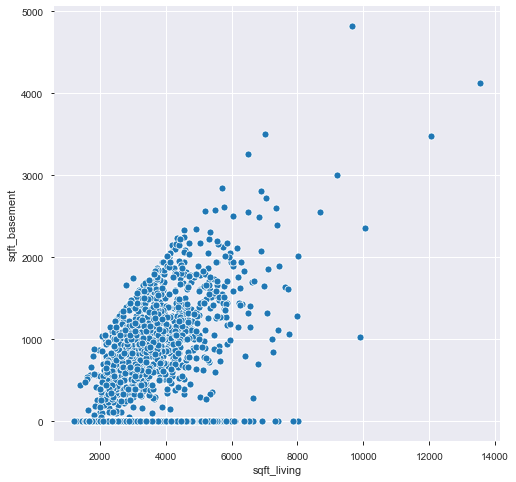

In [470]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_living'], me2000_geo_df['sqft_basement'])

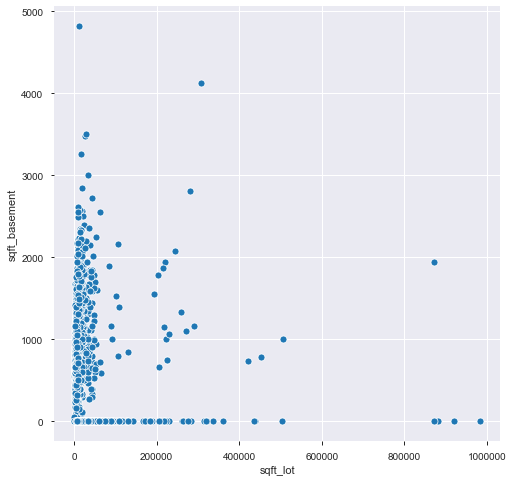

In [475]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_lot'], me2000_geo_df['sqft_basement'])

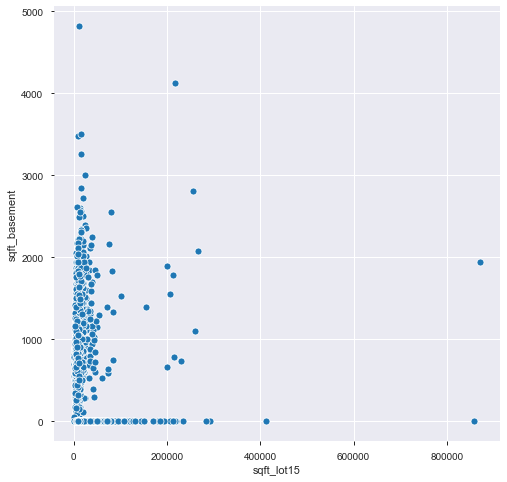

In [476]:
plt.figure(figsize = (8,8))
ax= sns.scatterplot(me2000_geo_df['sqft_lot15'], me2000_geo_df['sqft_basement'])

In [479]:
sqftbasement = 'sqft_basement~sqft_living15'
model = ols(sqftbasement, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqft_basement   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.96
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           0.000114
Time:                        14:36:44   Log-Likelihood:                -15825.
No. Observations:                2000   AIC:                         3.165e+04
Df Residuals:                    1998   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       405.9666     54.446      7.456      0.000     299.189     512.744
sqft_living15     0.0681      0.018      3.867      0.000       0.034       0.103
==============================================================================
Omnibus:                      210.017   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.204
Skew:                           0.848   Prob(JB):                     5.25e-62
Kurtosis:                       3.715   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [480]:
sqftabove = 'sqft_above~sqft_living'
model = ols(sqftabove, data = me2000_geo_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqft_above   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     4226.
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:40:19   Log-Likelihood:                -15690.
No. Observations:                2000   AIC:                         3.138e+04
Df Residuals:                    1998   BIC:                         3.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     158.7360     45.747      3.470      0.001      69.019     248.453
sqft_living     0.7846      0.012     65.009      0.000       0.761       0.808
==============================================================================
Omnibus:                       94.703   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.987
Skew:                          -0.315   Prob(JB):                     2.10e-14
Kurtosis:                       2.402   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

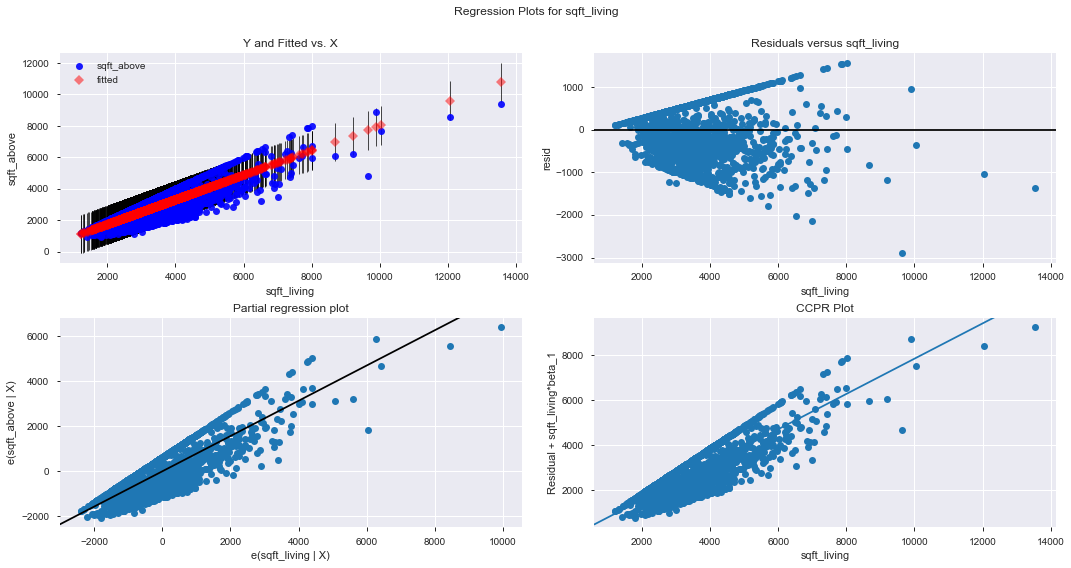

In [481]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()